In [75]:
#importations de bibilothèques
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns         



In [76]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
data=pd.read_excel('archive/dataset.xlsx')
df=data.copy()
df.head()


Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [9]:
df.shape

(5644, 111)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [11]:
df.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.866736e-09  ...                         -1.379737e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.416397e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.655685e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

In [18]:
pd.set_option('display.max_columns', 111)
df.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                           

<Axes: >

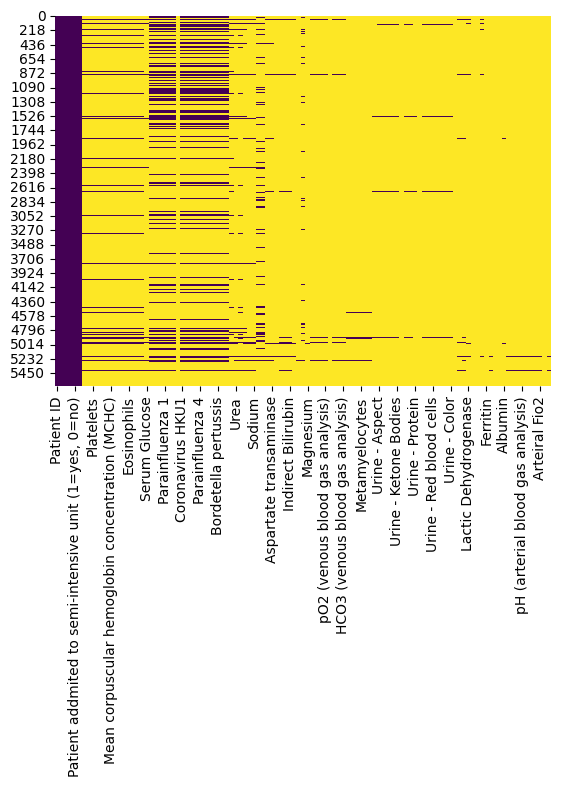

In [16]:
sns.heatmap(df.isna(),cbar=False,cmap='viridis')

In [32]:
pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)


Mycoplasma pneumoniae                                    100.000000
Prothrombin time (PT), Activity                          100.000000
D-Dimer                                                  100.000000
Urine - Sugar                                            100.000000
Partial thromboplastin time (PTT)                        100.000000
Urine - Nitrite                                           99.982282
Fio2 (venous blood gas analysis)                          99.982282
Vitamin B12                                               99.946846
Lipase dosage                                             99.858257
Albumin                                                   99.769667
Phosphor                                                  99.645641
Arteiral Fio2                                             99.645641
Ferritin                                                  99.592488
Arterial Lactic Acid                                      99.521616
Hb saturation (arterial blood gases)            

KeyError: "['Patient ID'] not found in axis"

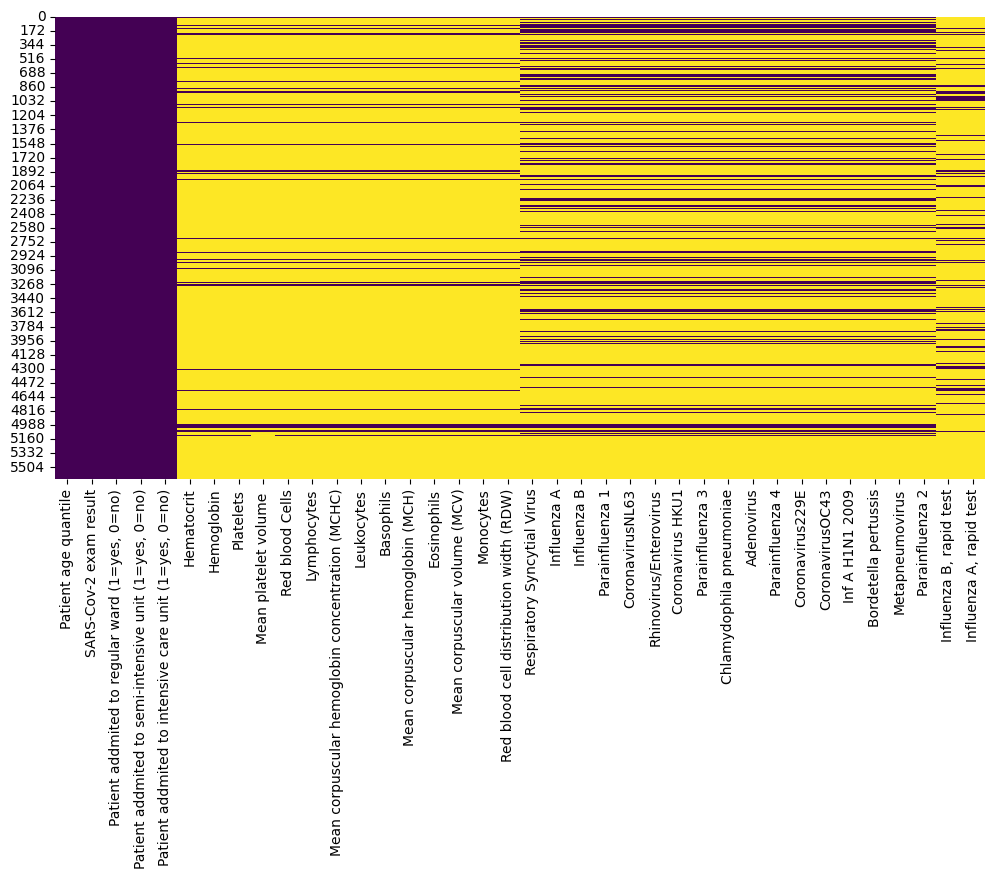

In [82]:

#elimination des colonnes inutiles(+90% de valeurs manquantes)
df1=df[df.columns[df.isna().sum()/df.shape[0]*100<90]]
df1.shape
plt.figure(figsize=(12,6))
sns.heatmap(df1.isna(),cbar=False,cmap='viridis')
df1=df1.drop('Patient ID',axis=1)
df=df1.copy()

In [83]:
target=df1['SARS-Cov-2 exam result']
target.value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

In [84]:
#Significationd des variables
df1.dtypes.value_counts()

object     20
float64    14
int64       4
Name: count, dtype: int64

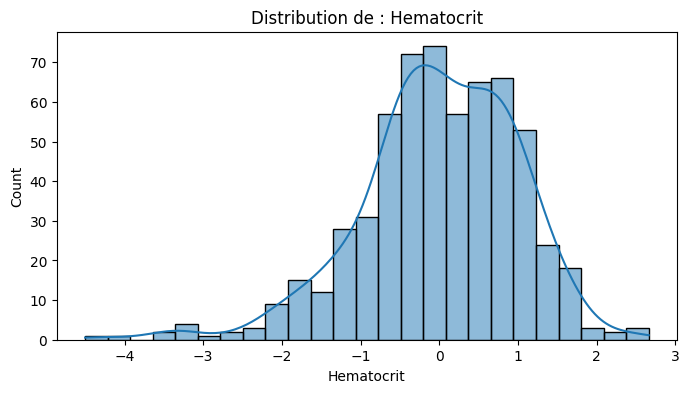

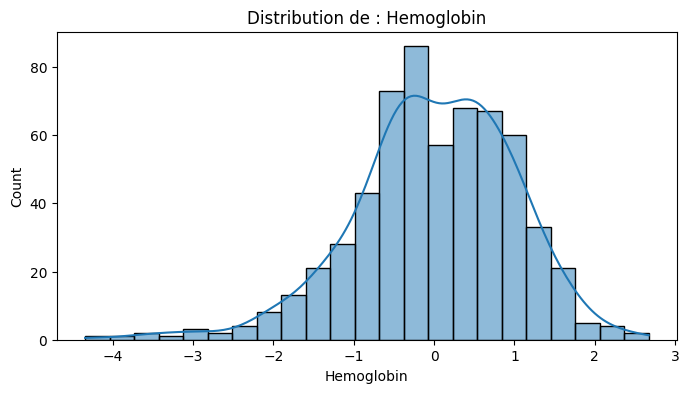

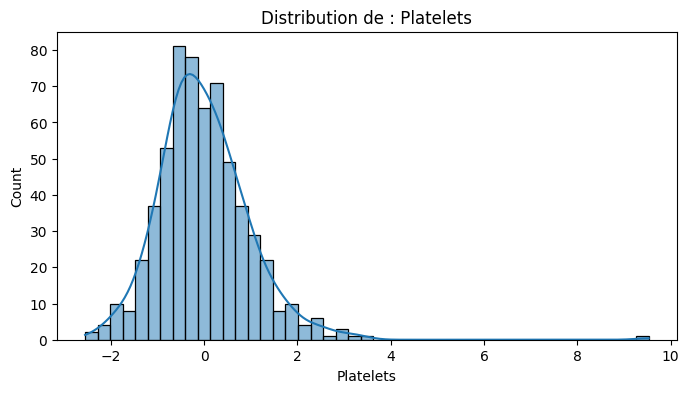

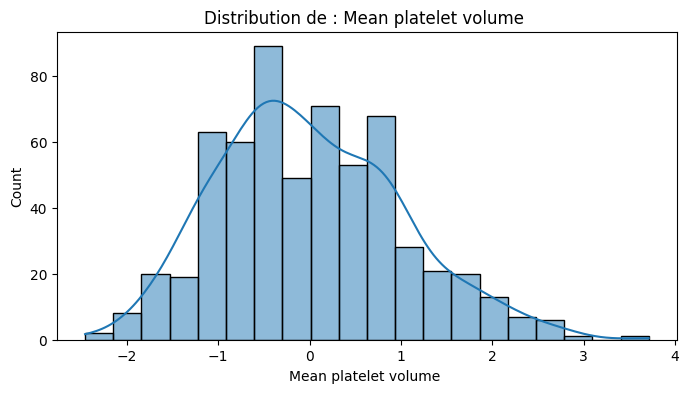

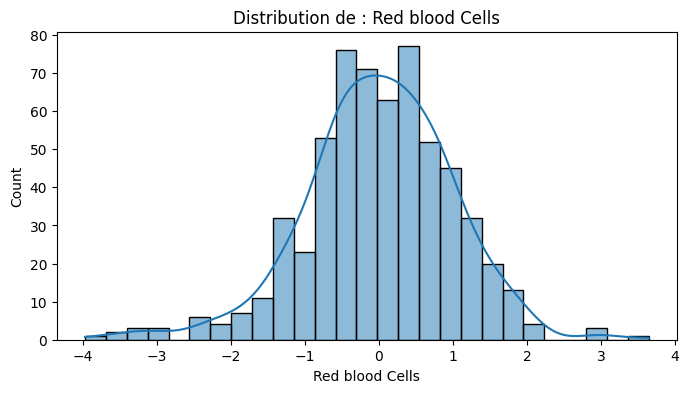

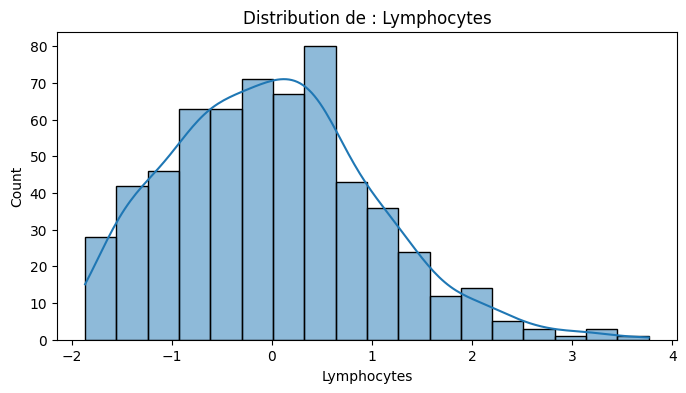

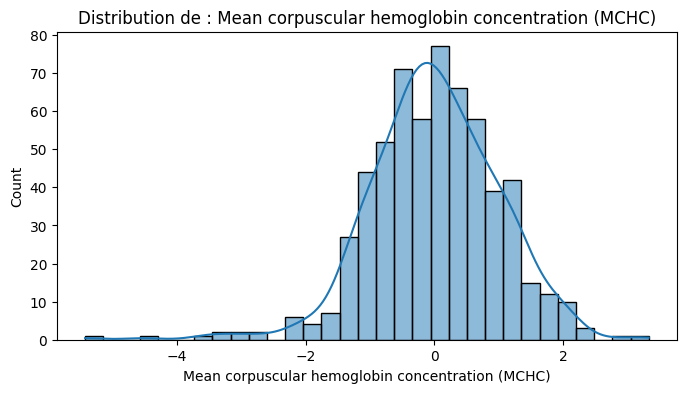

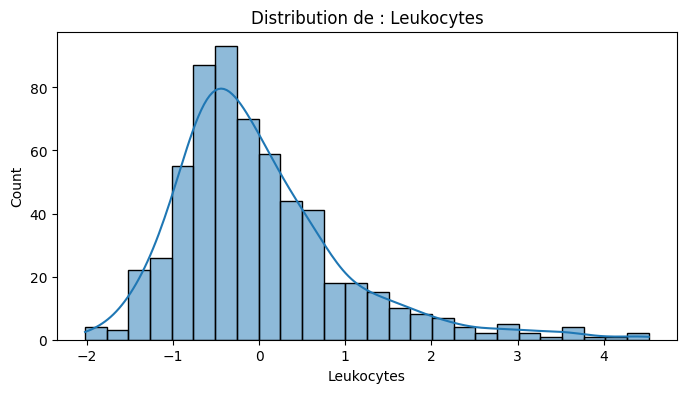

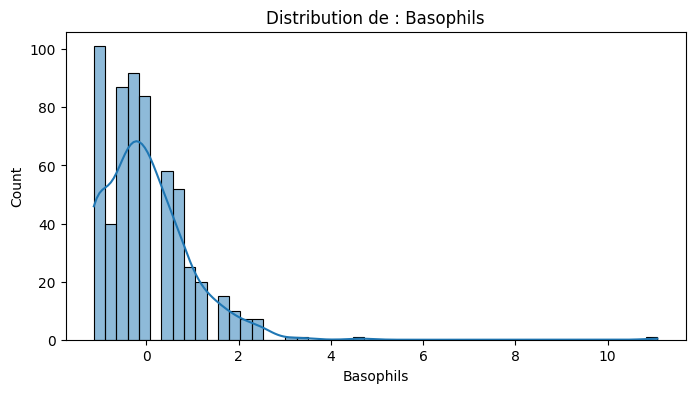

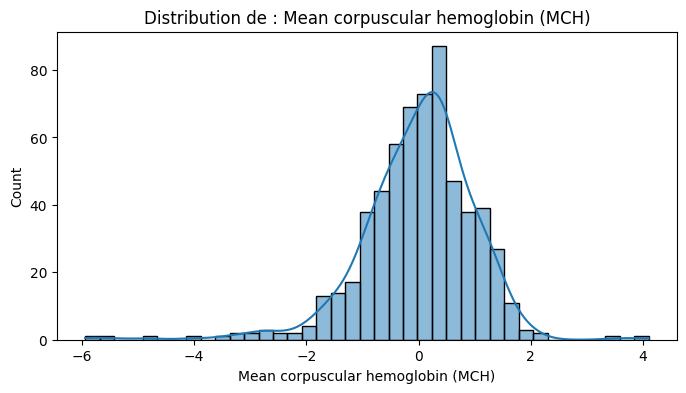

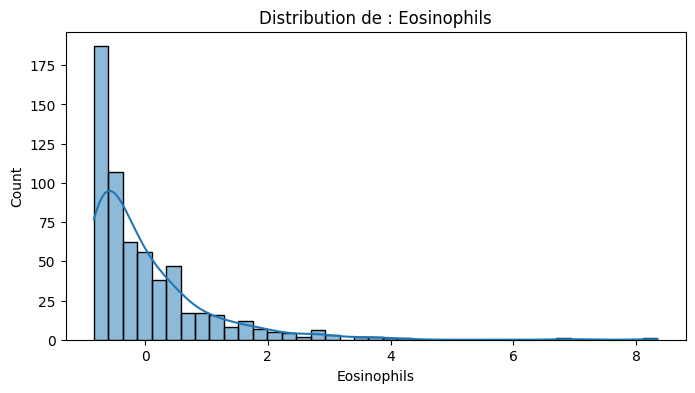

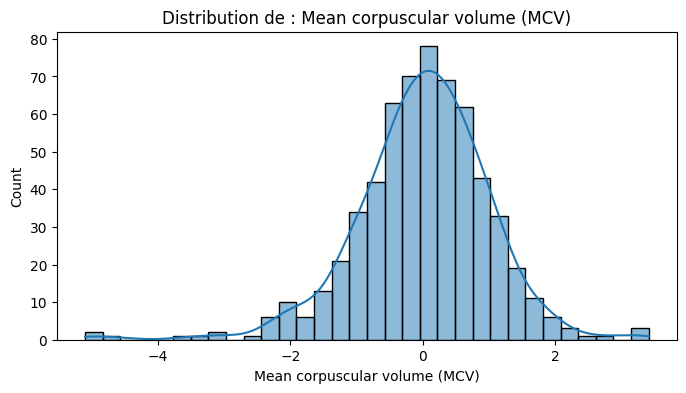

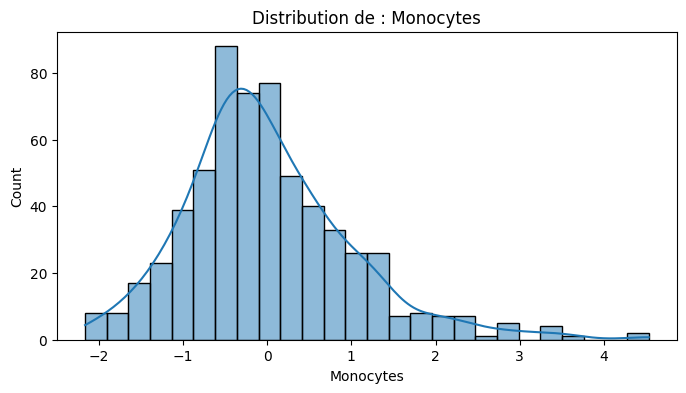

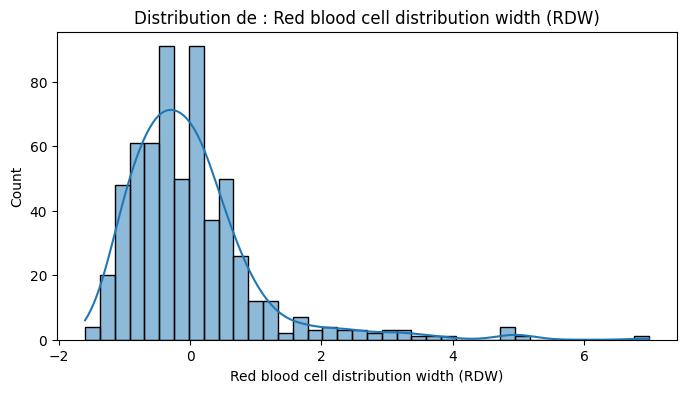

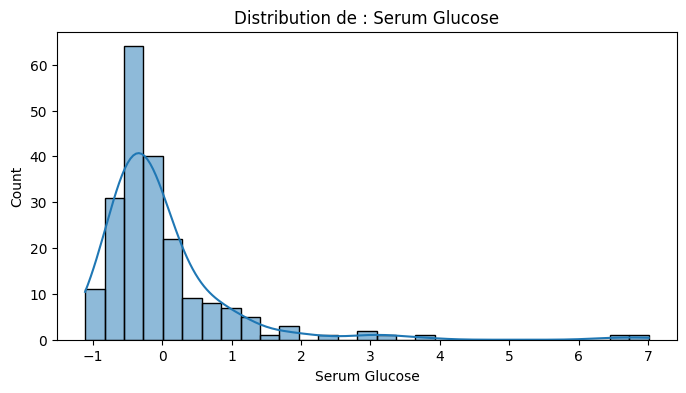

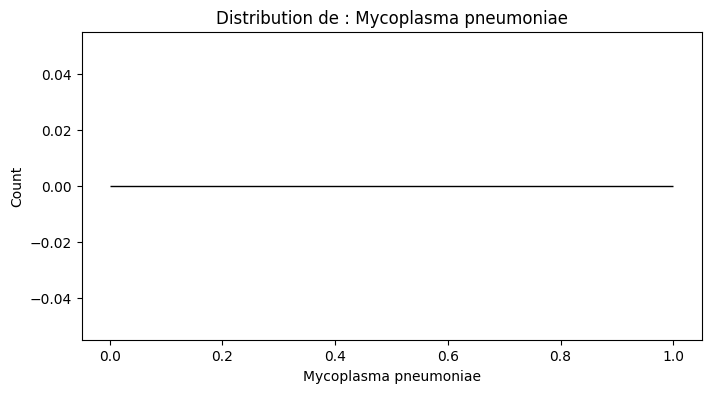

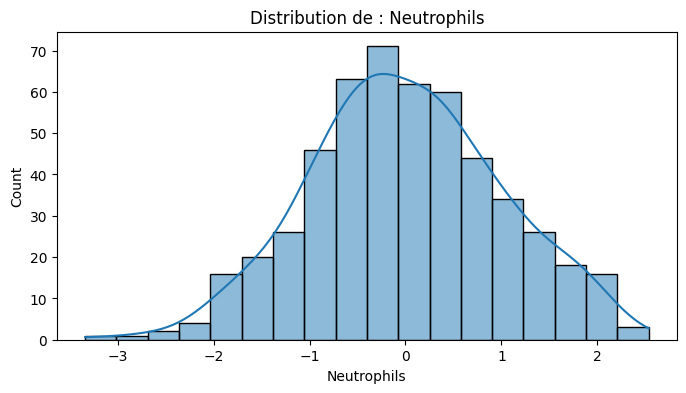

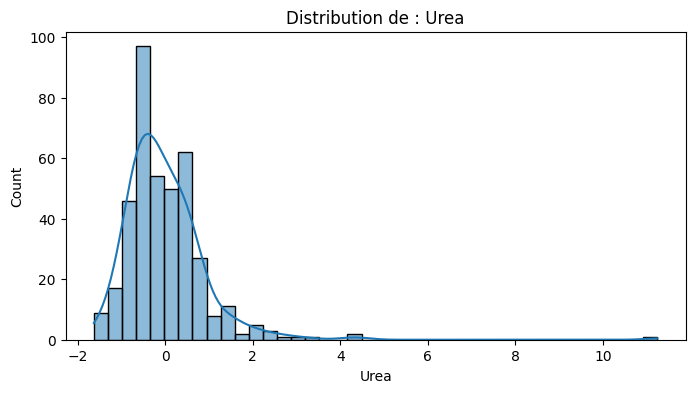

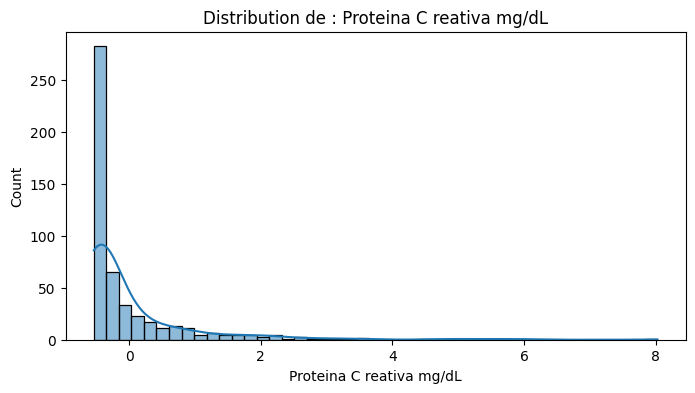

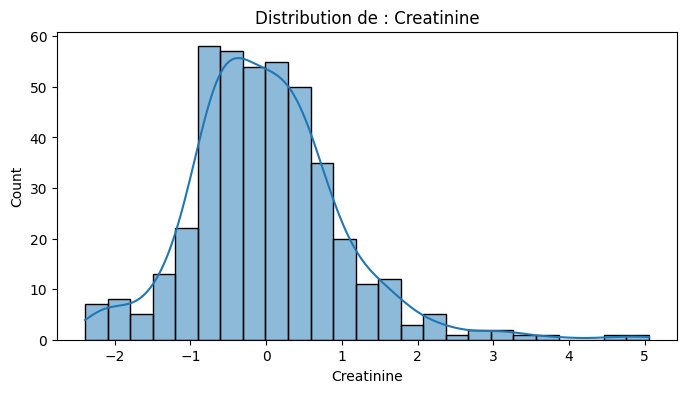

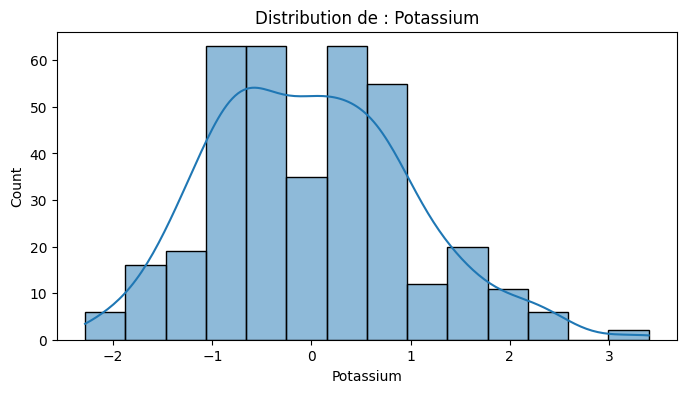

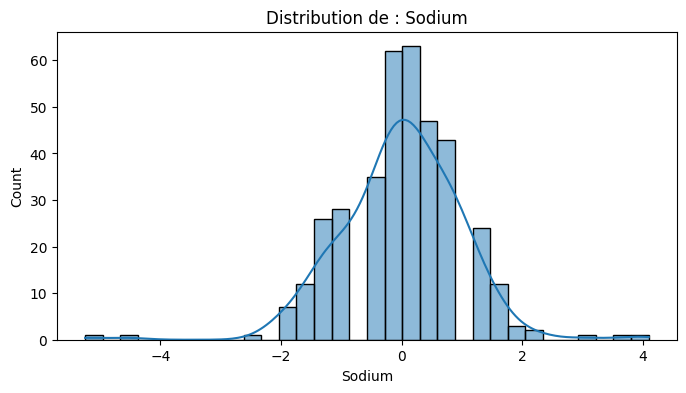

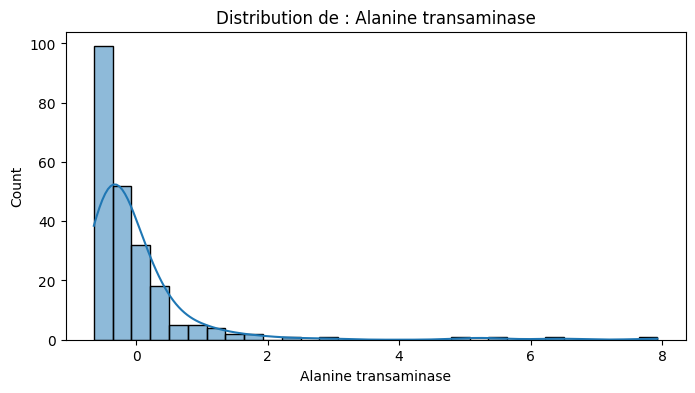

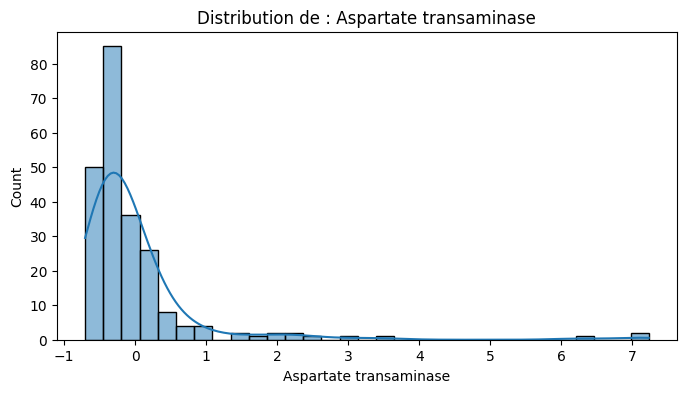

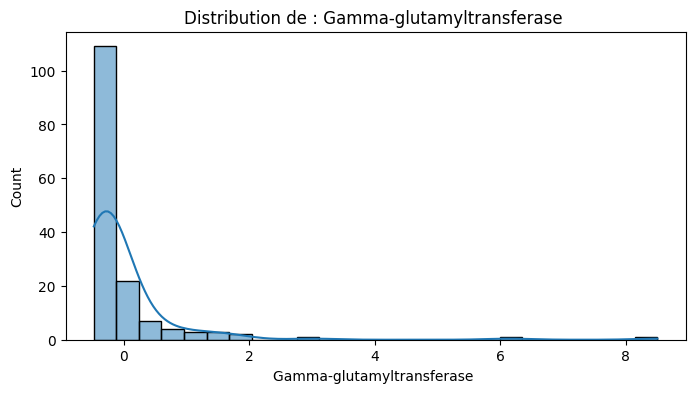

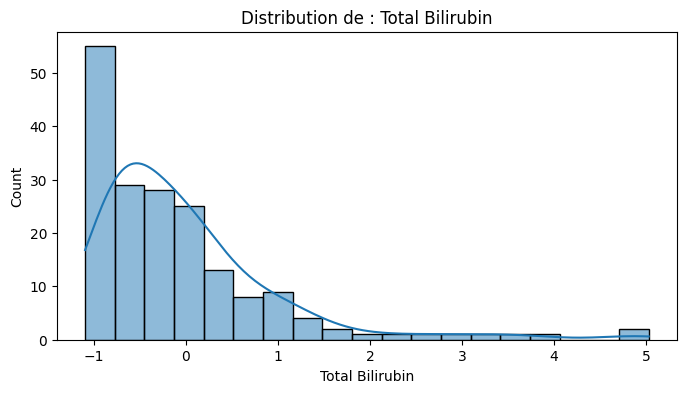

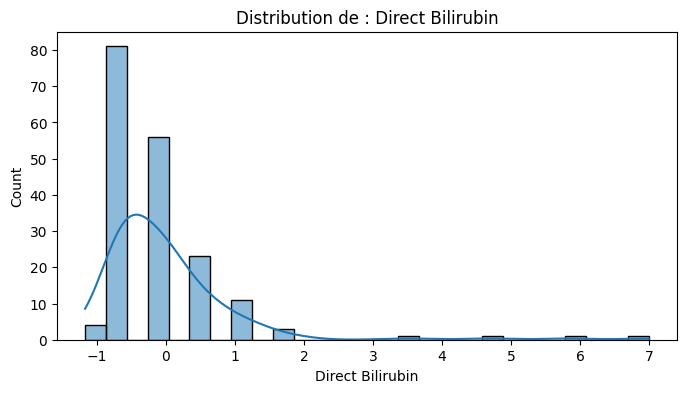

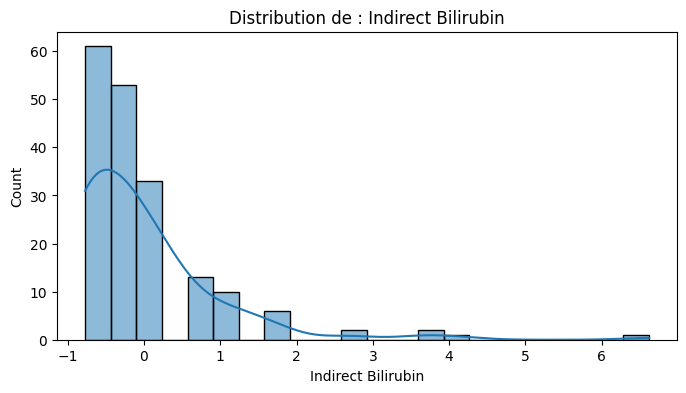

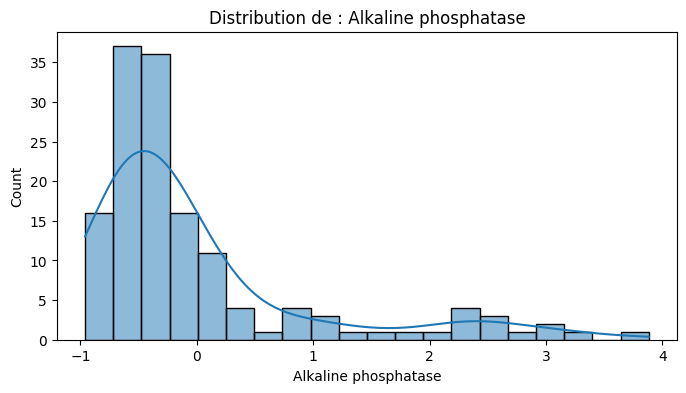

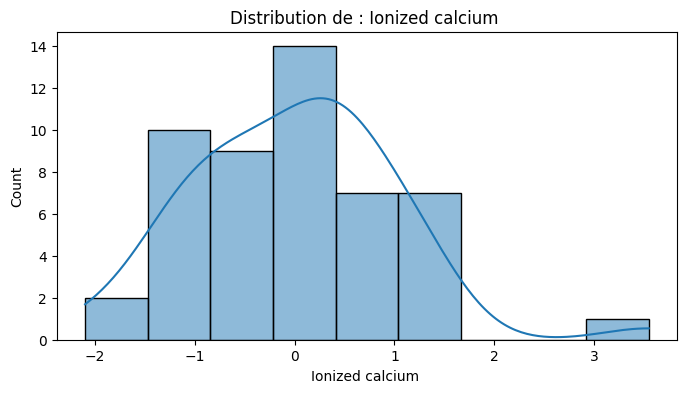

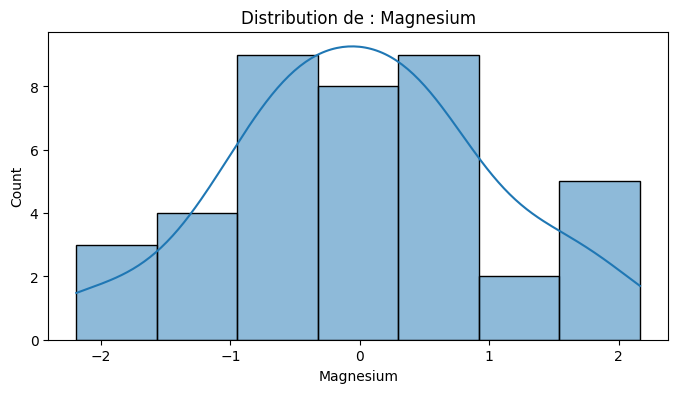

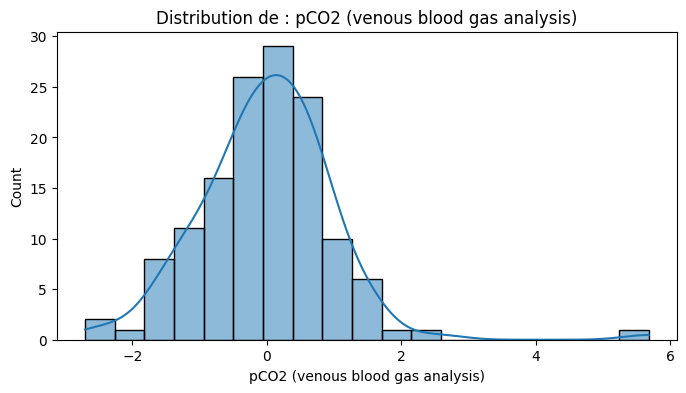

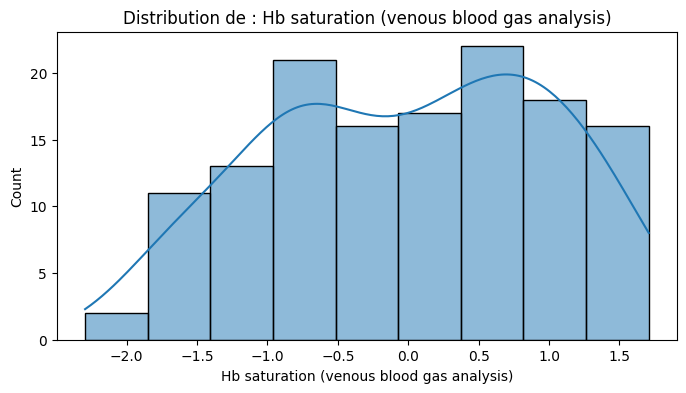

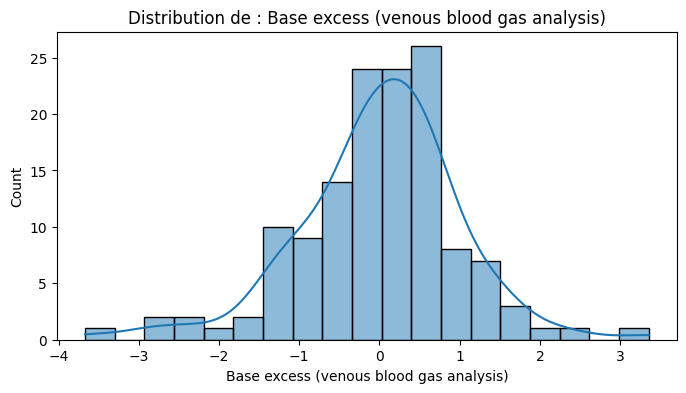

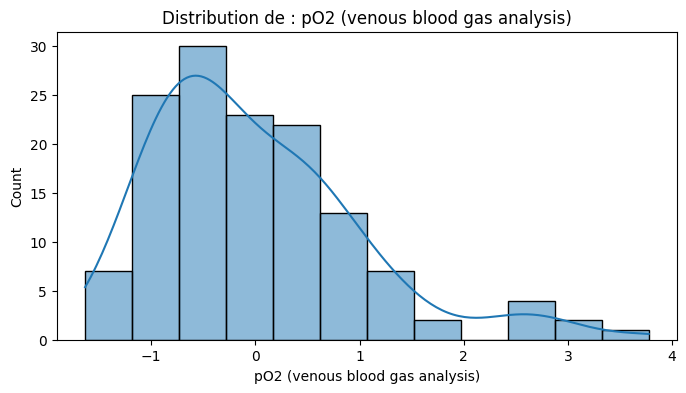

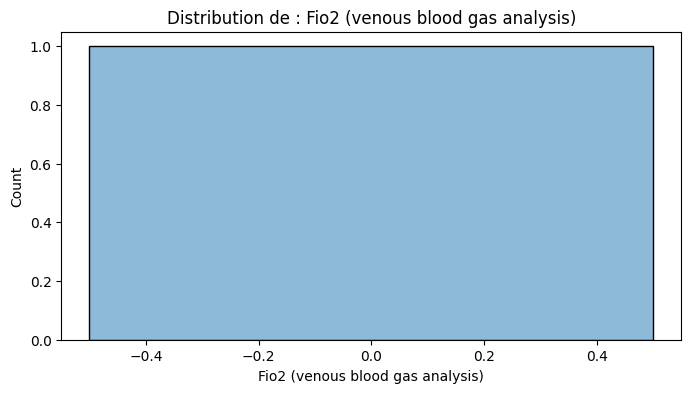

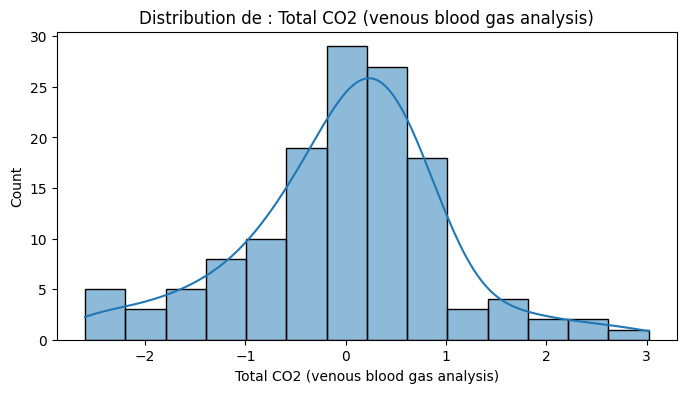

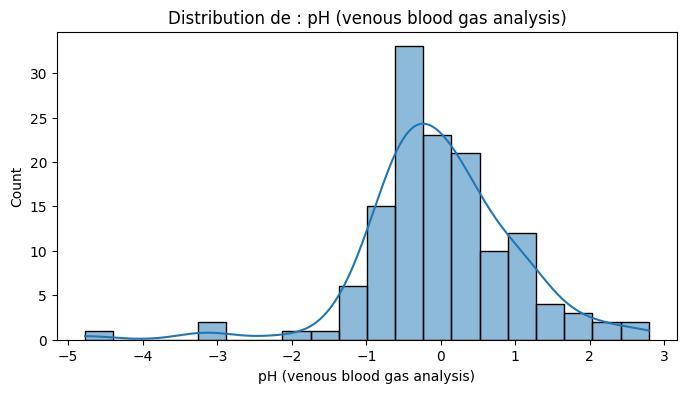

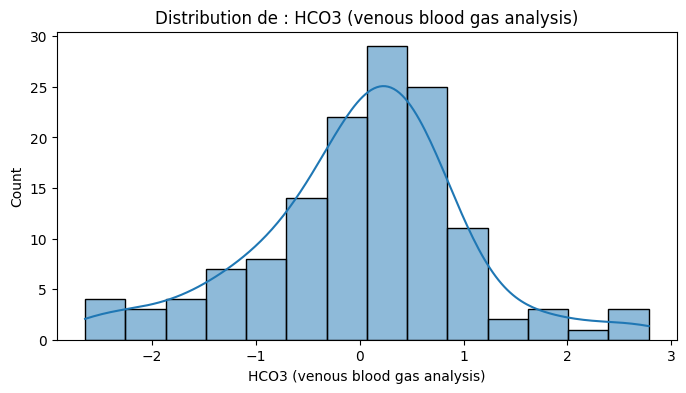

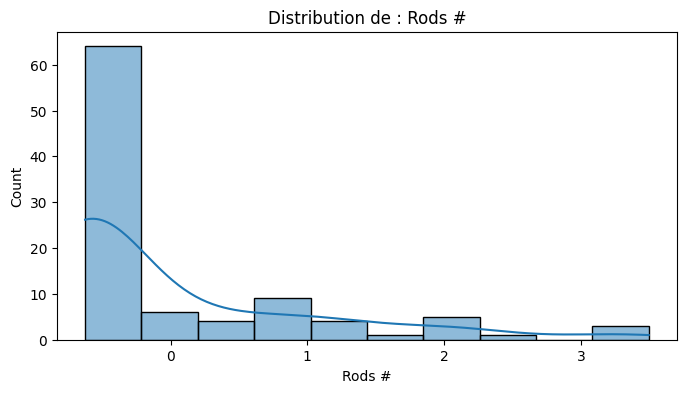

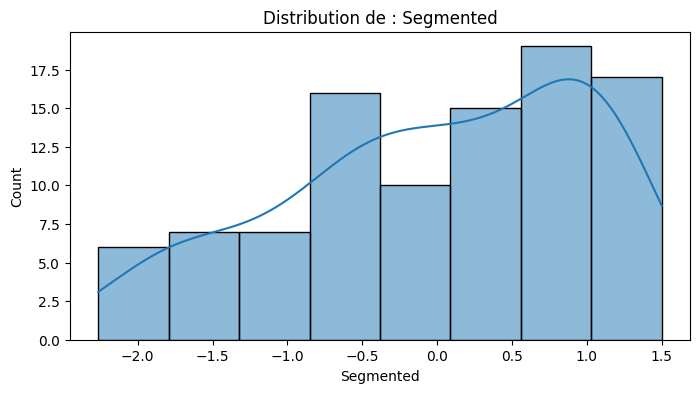

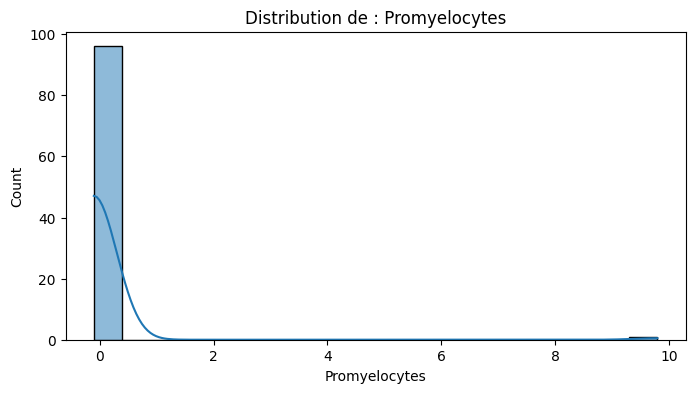

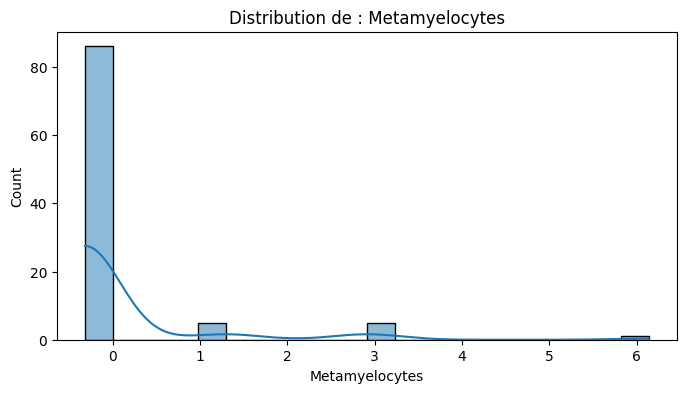

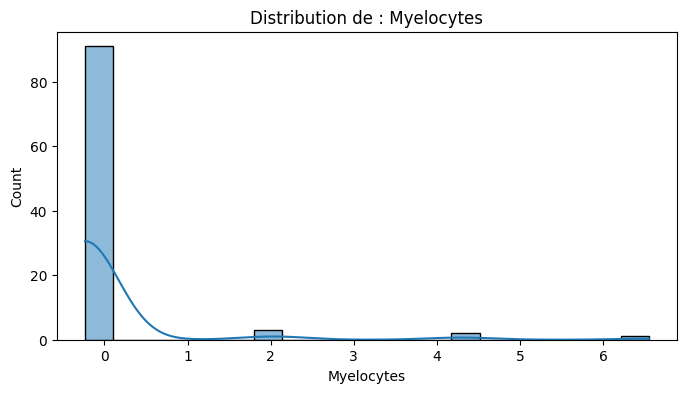

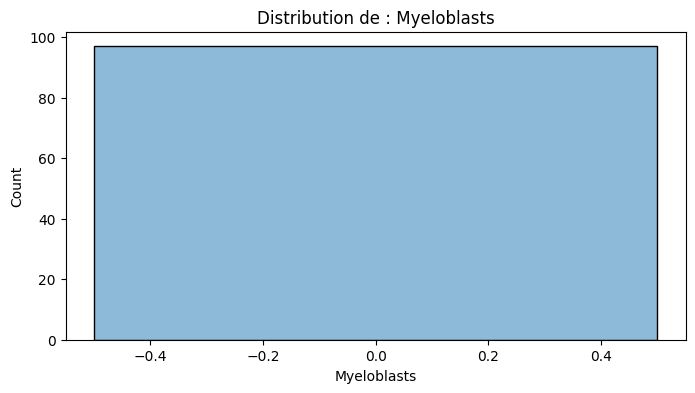

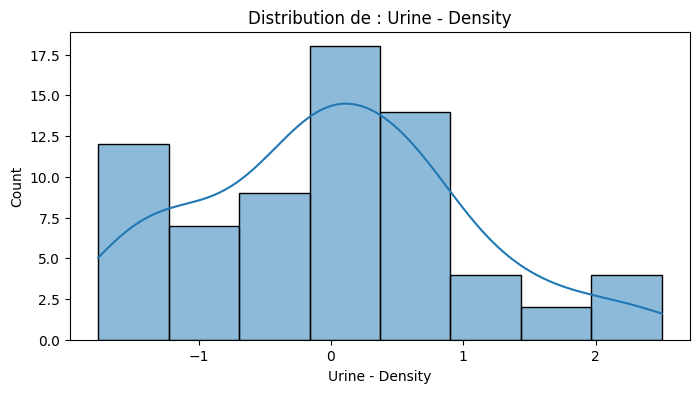

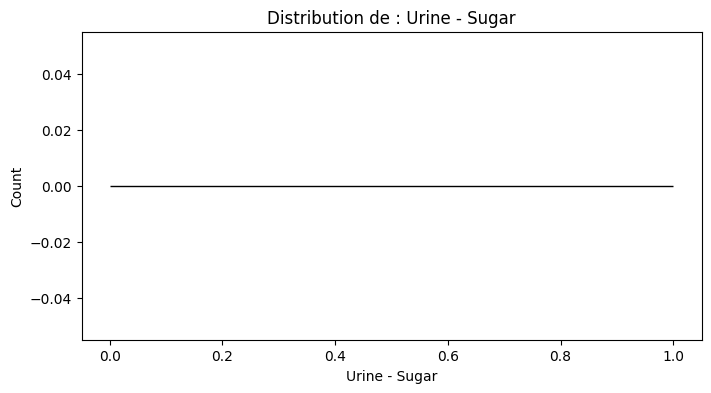

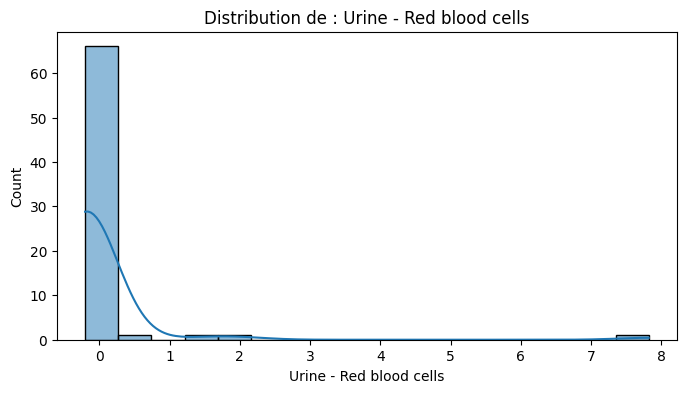

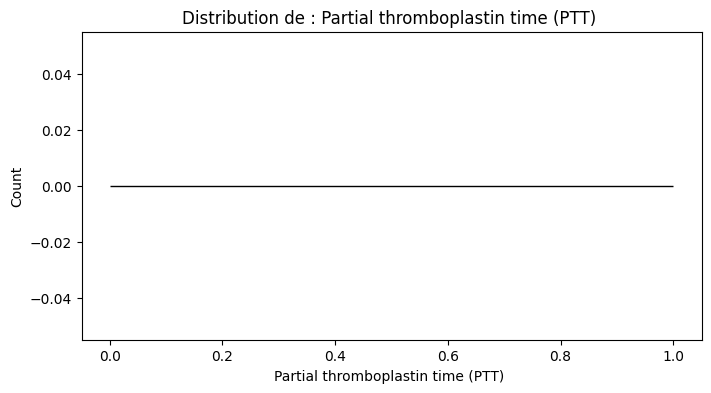

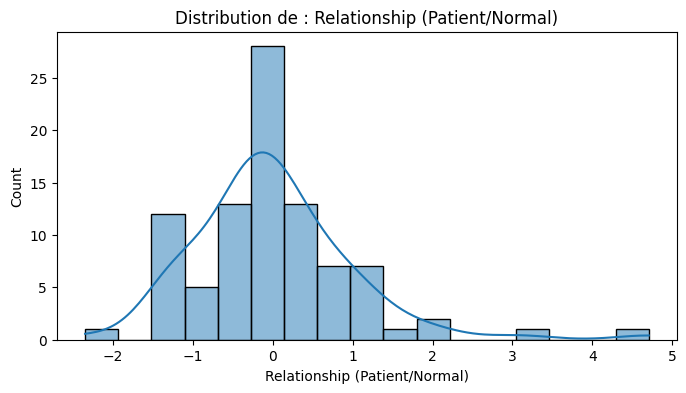

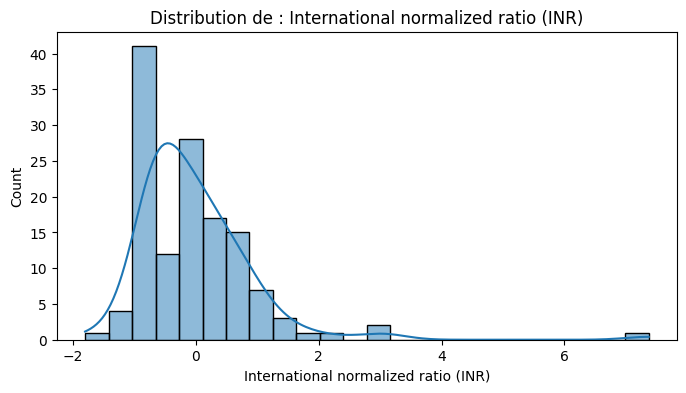

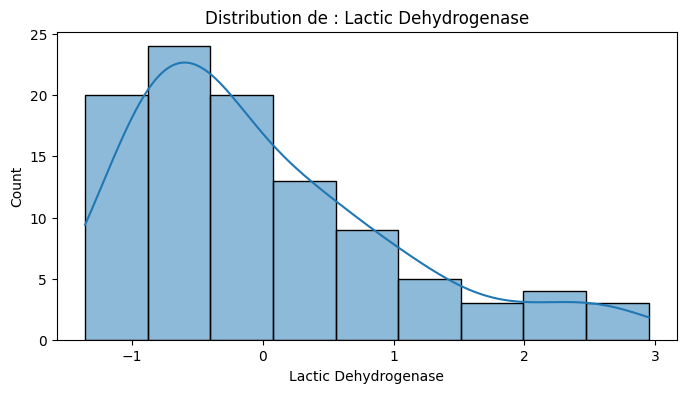

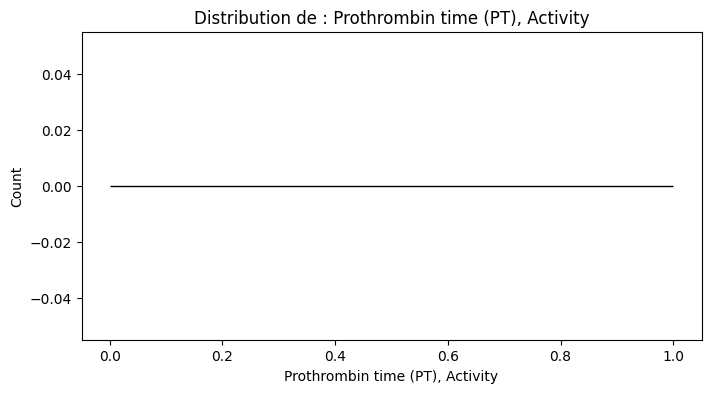

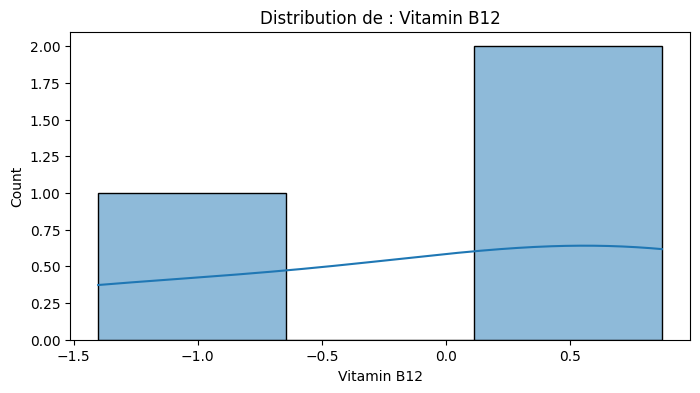

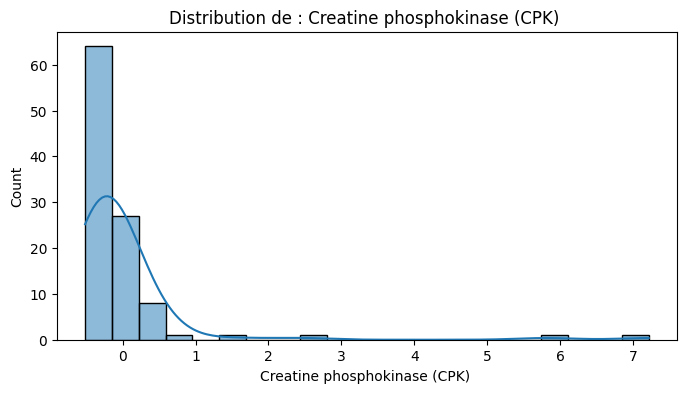

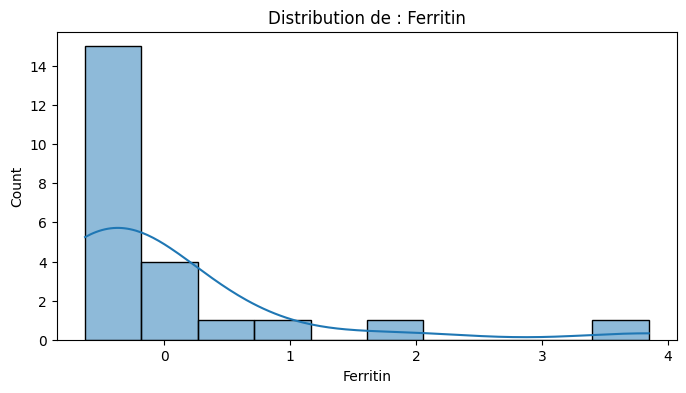

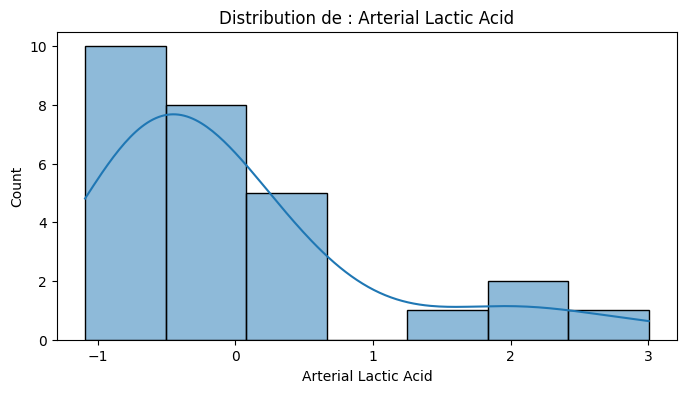

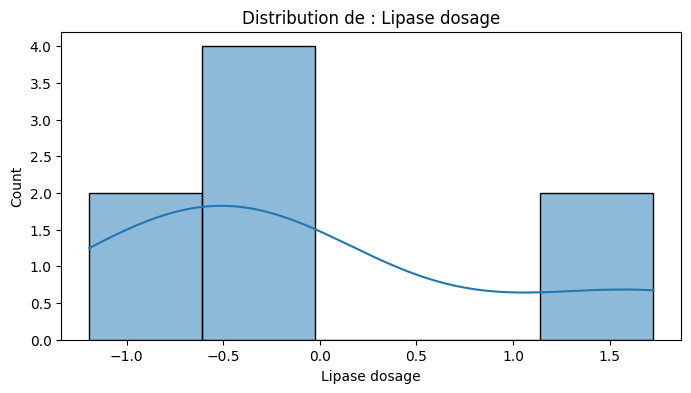

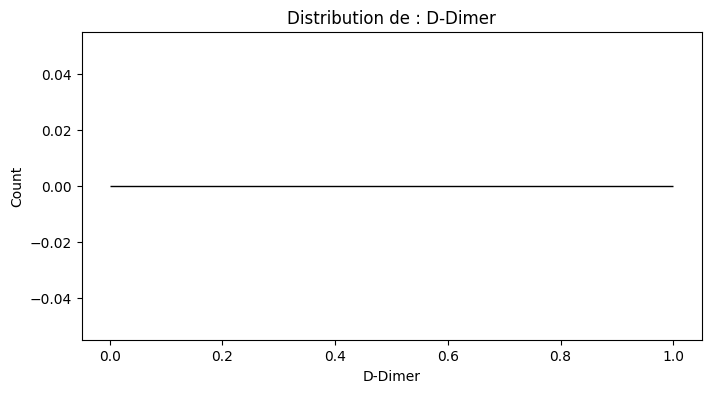

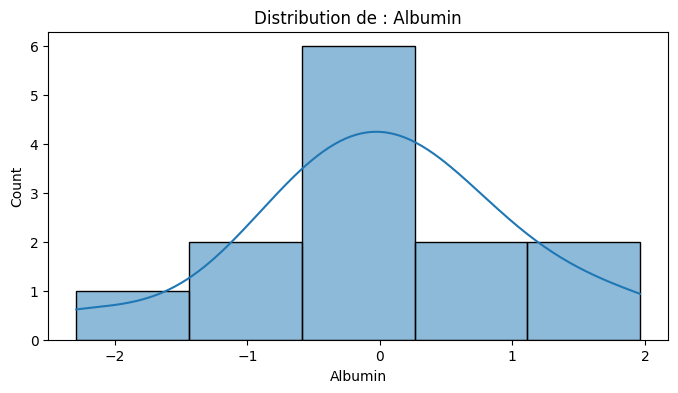

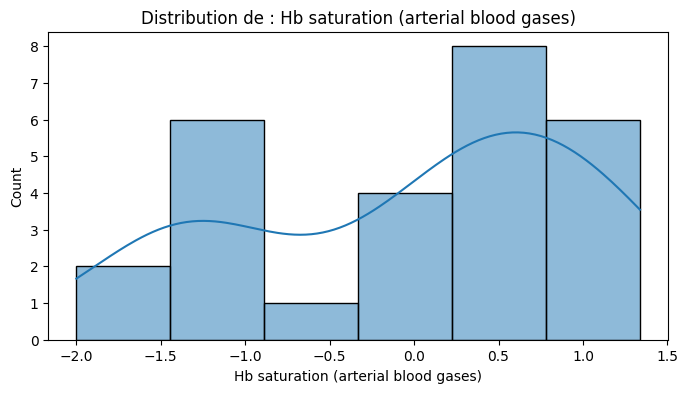

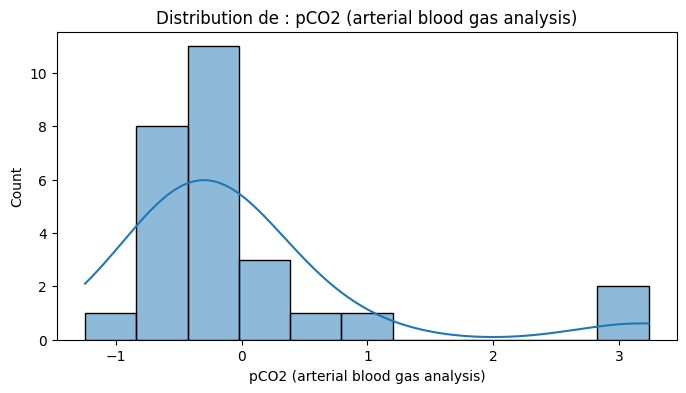

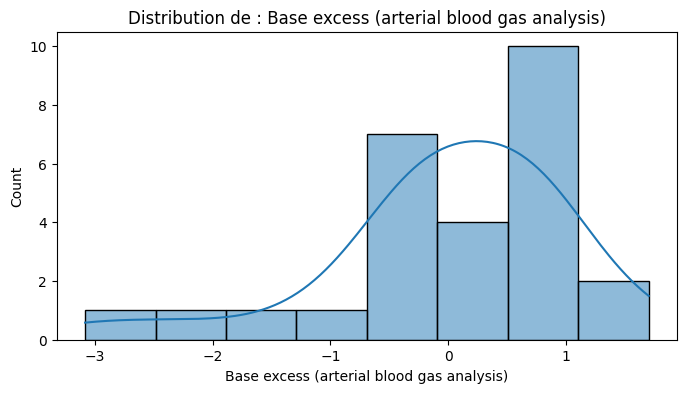

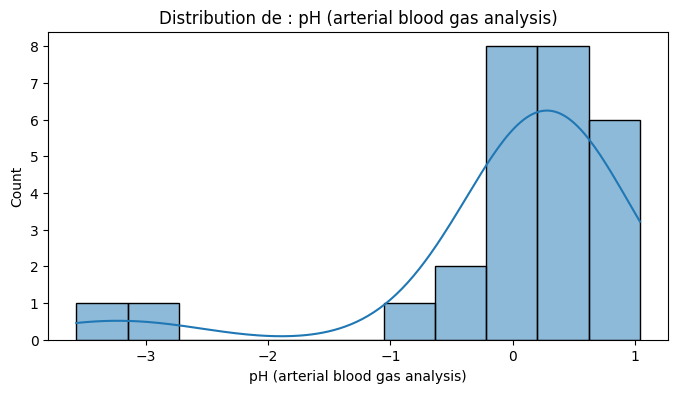

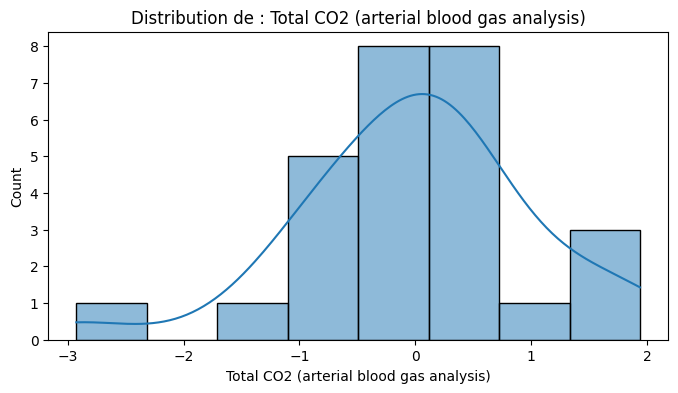

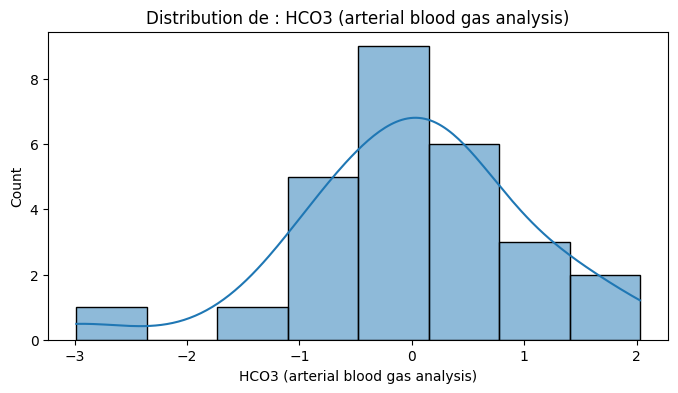

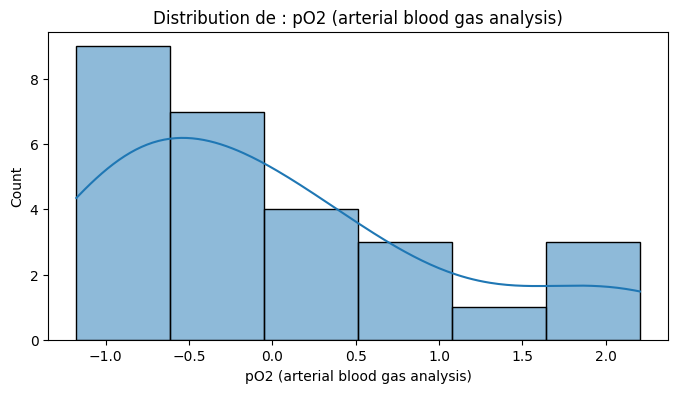

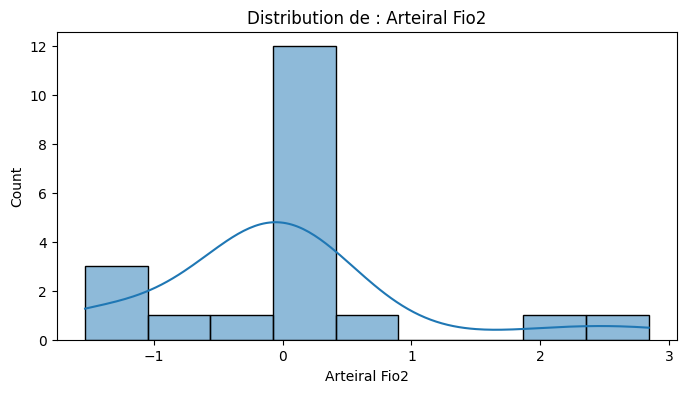

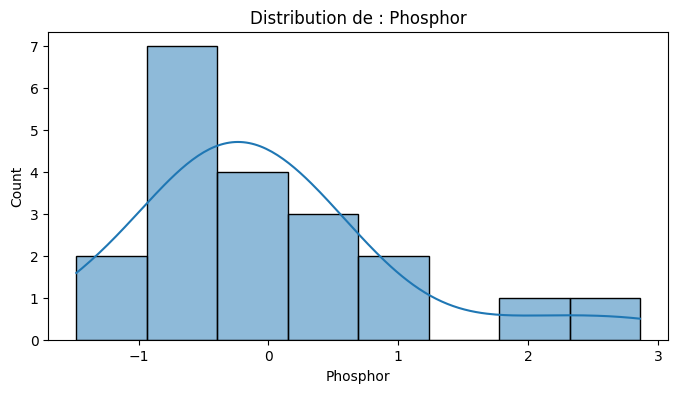

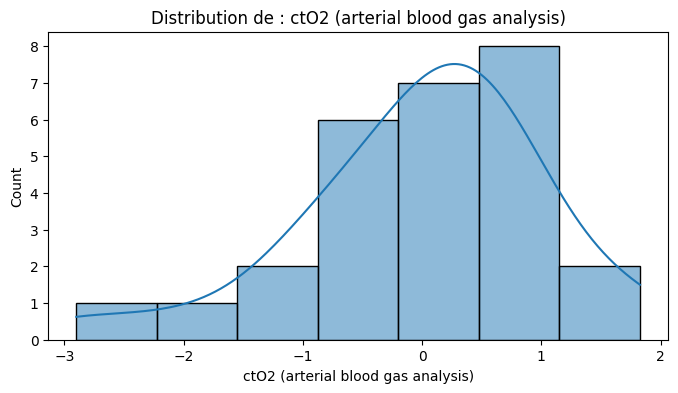

In [45]:

# On boucle sur les colonnes 'float' du dataframe df
for col in df.select_dtypes(include=['float']): # Inclus aussi les 'int' pour l'analyse
    plt.figure(figsize=(8, 4)) # Crée une nouvelle figure pour ne pas superposer les graphes
    sns.histplot(df[col], kde=True) # kde=True ajoute la ligne de densité
    plt.title(f"Distribution de : {col}")
    plt.show()


<Axes: xlabel='Patient age quantile', ylabel='Count'>

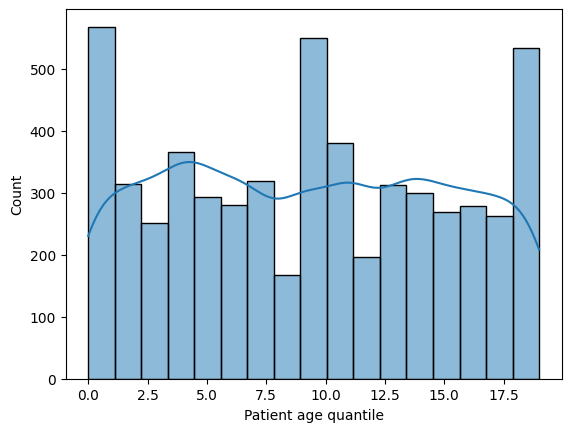

In [85]:
sns.histplot(df['Patient age quantile'], kde=True)

In [86]:
#Variables CATEGORIELLES
df1['SARS-Cov-2 exam result'].value_counts(normalize=True)

for col in df1.select_dtypes(include=['object']):
    print(f'{col:-<50}{df[col].unique()}')

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

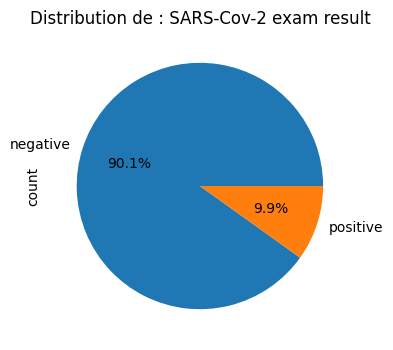

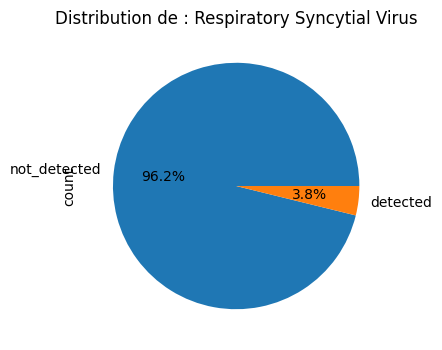

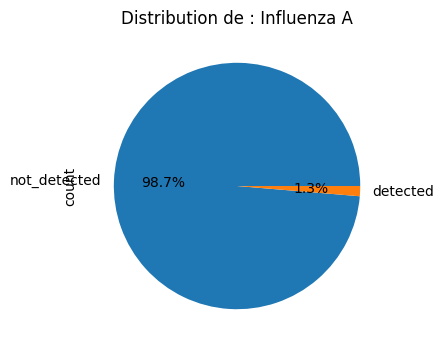

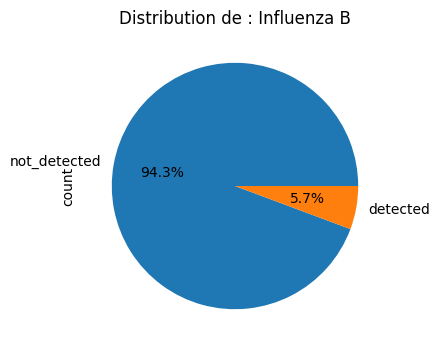

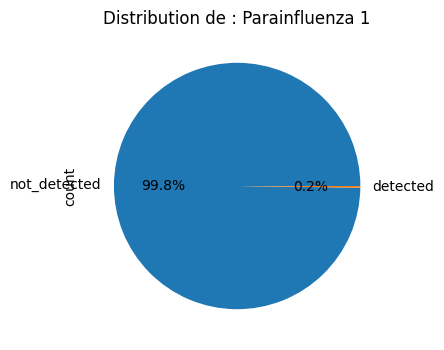

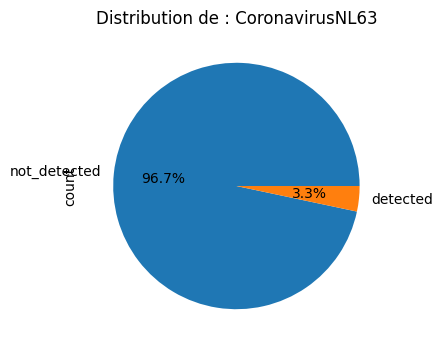

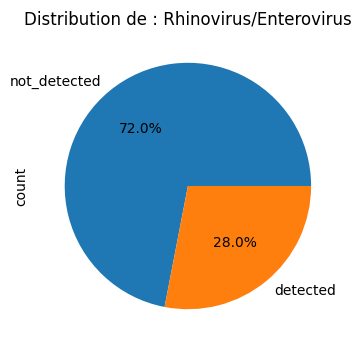

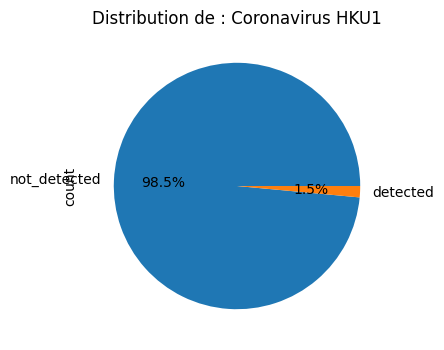

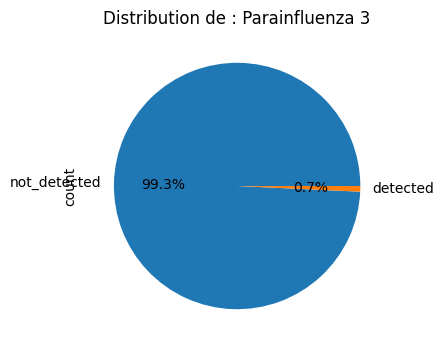

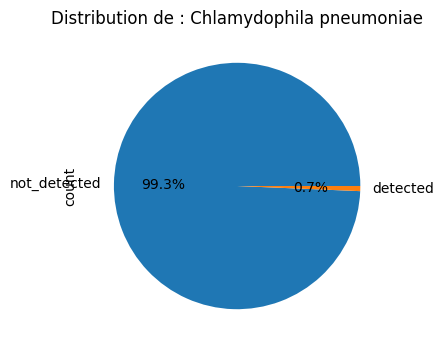

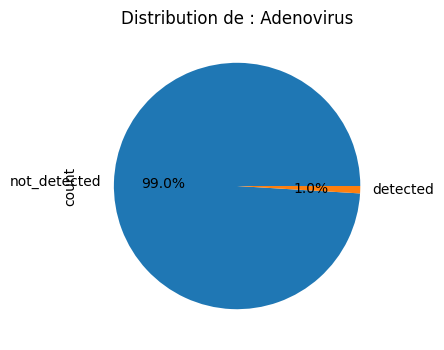

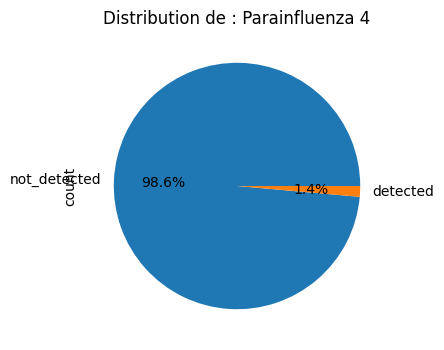

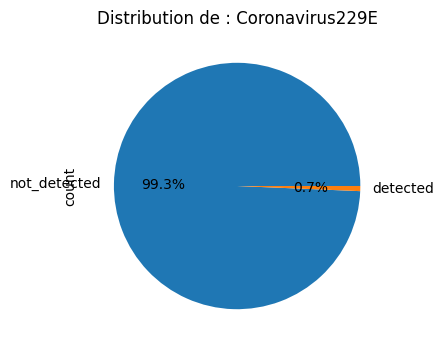

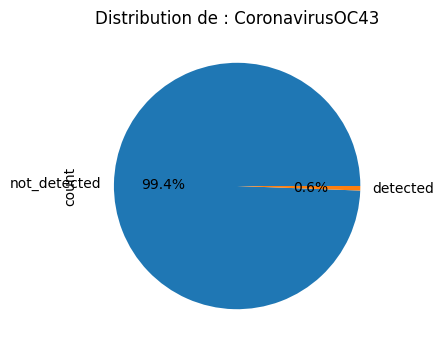

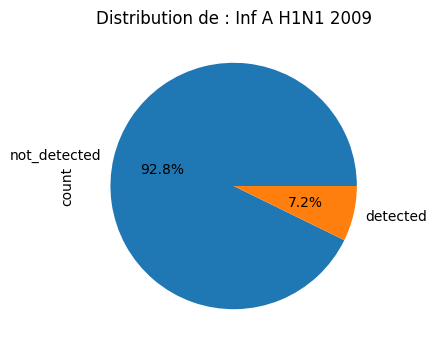

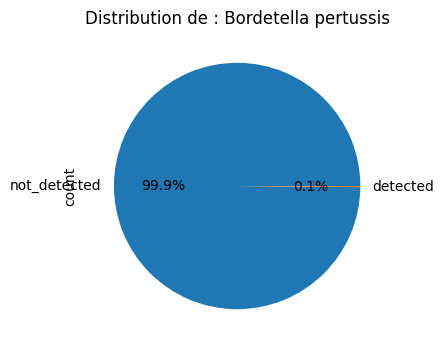

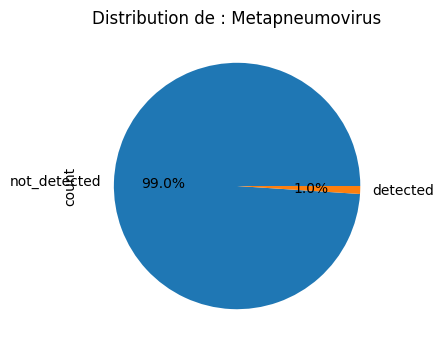

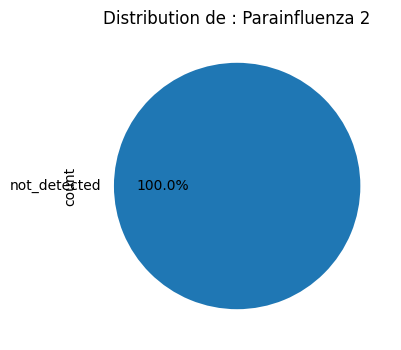

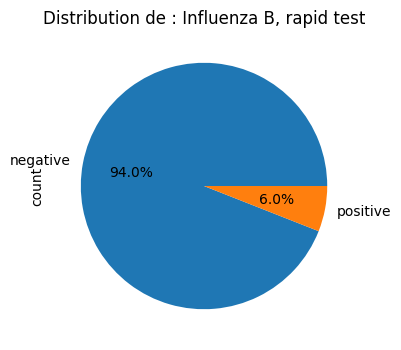

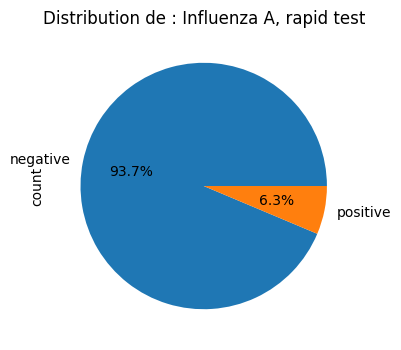

In [87]:
for col in df1.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 4))
    plt.title(f"Distribution de : {col}")
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [88]:
df=df1.copy()
positive_df=df[df['SARS-Cov-2 exam result']=='positive']
negative_df=df[df['SARS-Cov-2 exam result']=='negative']    


In [89]:
missing_rate=df.isna().sum()/df.shape[0]*100
missing_rate.sort_values(ascending=False)

Mean platelet volume                                     89.386960
Monocytes                                                89.351524
Platelets                                                89.333806
Red blood Cells                                          89.333806
Mean corpuscular hemoglobin concentration (MCHC)         89.333806
Leukocytes                                               89.333806
Red blood cell distribution width (RDW)                  89.333806
Mean corpuscular hemoglobin (MCH)                        89.333806
Eosinophils                                              89.333806
Mean corpuscular volume (MCV)                            89.333806
Basophils                                                89.333806
Lymphocytes                                              89.333806
Hemoglobin                                               89.316088
Hematocrit                                               89.316088
Influenza B, rapid test                                  85.47

In [90]:
viral_columns=df.columns[(missing_rate>75) & (missing_rate<87)]
blood_columns=df.columns[missing_rate>87]


C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


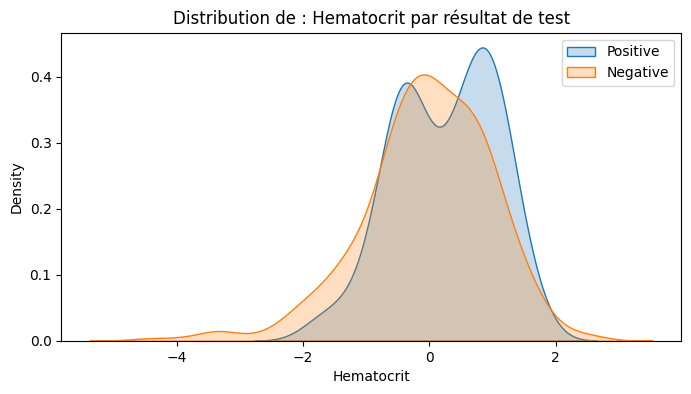

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


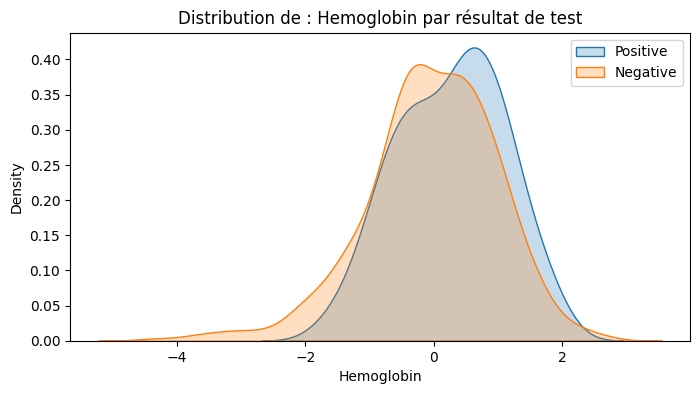

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


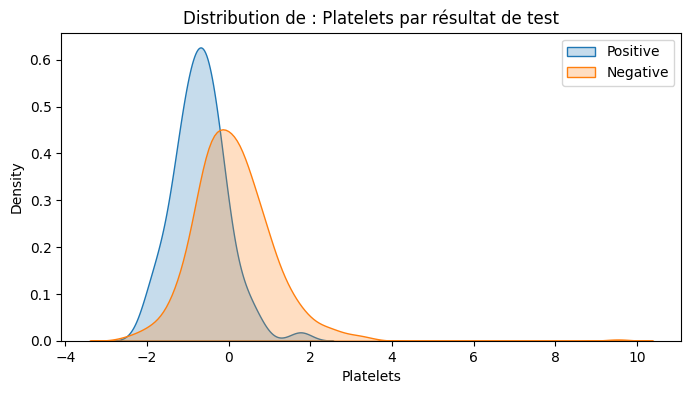

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


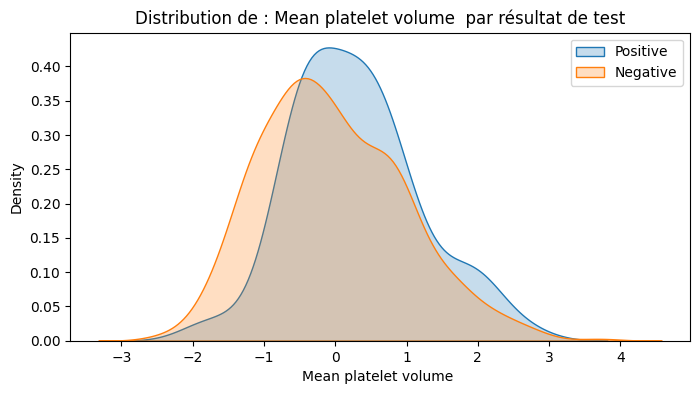

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


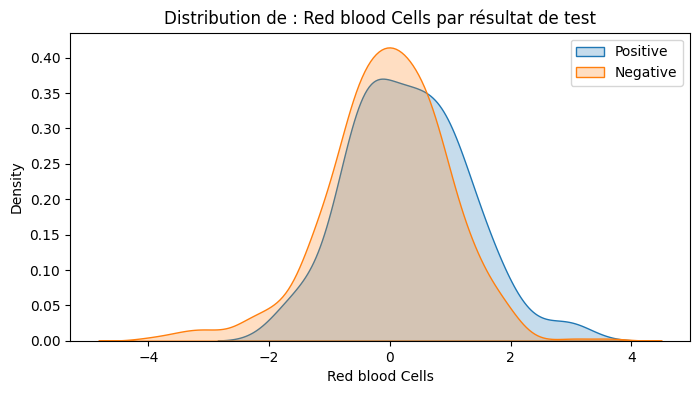

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


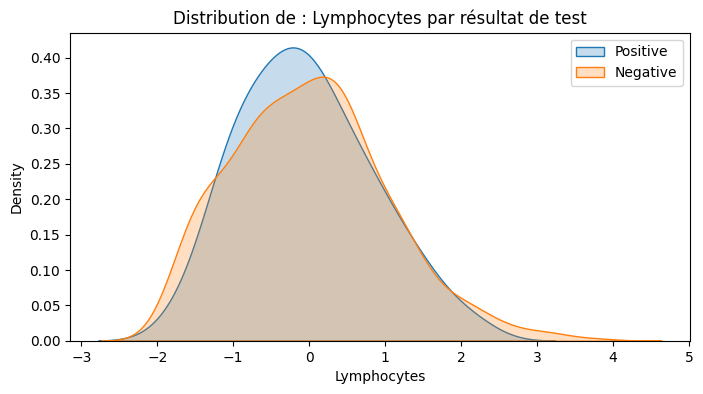

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


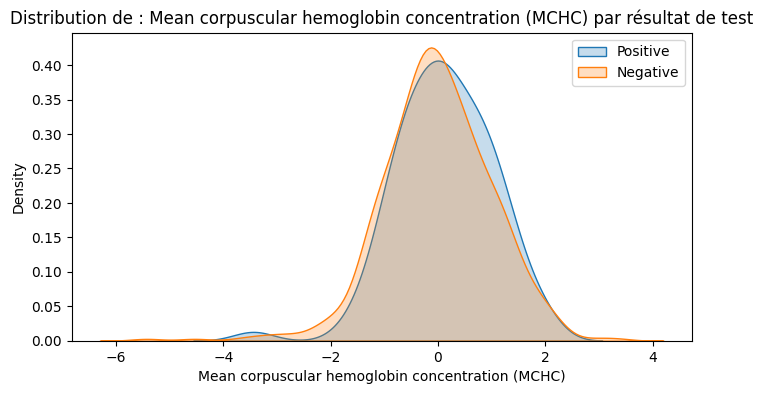

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


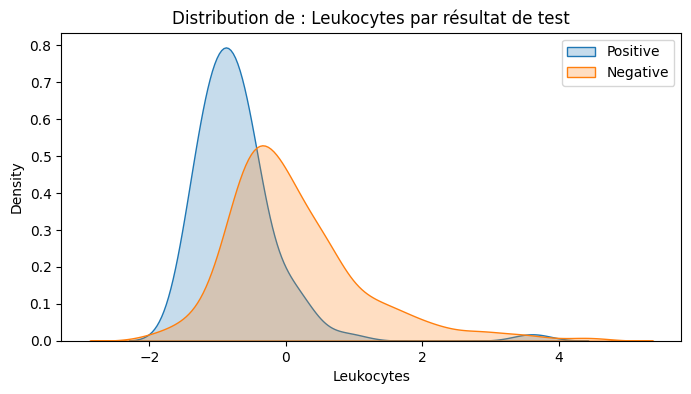

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


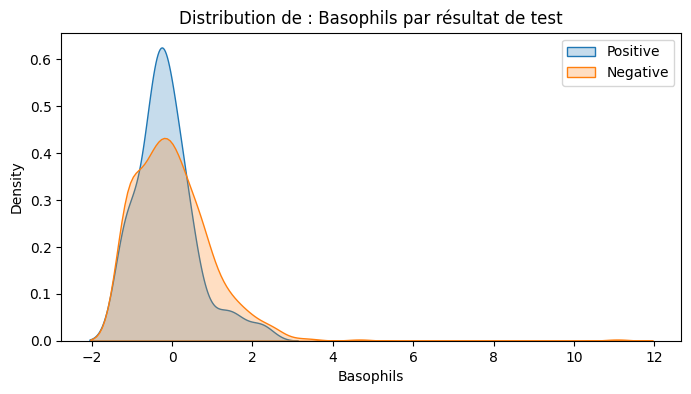

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


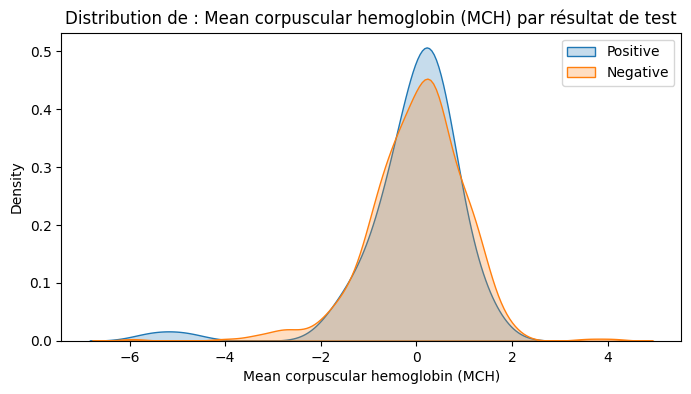

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


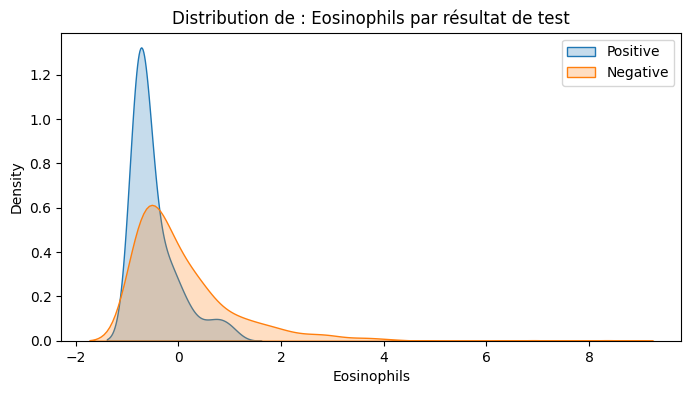

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


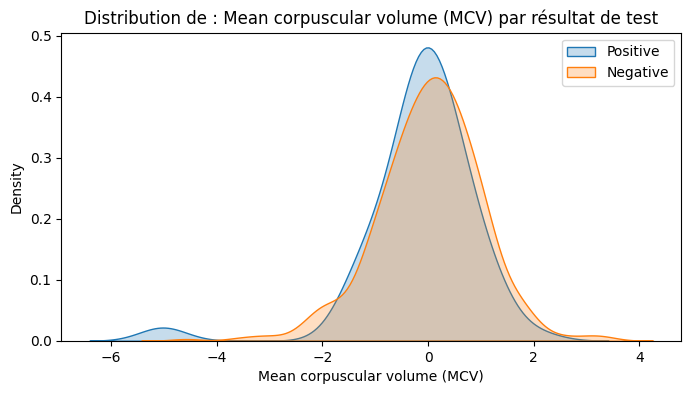

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


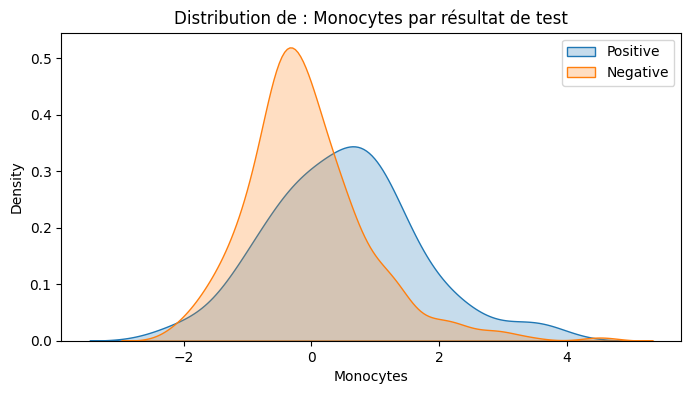

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df[col], label='Positive', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\4159758875.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df[col], label='Negative', shade=True)


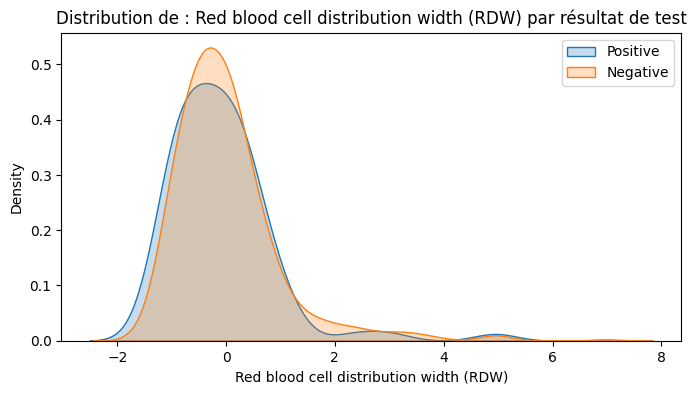

In [91]:
##Visualisation Target/blood
for col in blood_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(positive_df[col], label='Positive', shade=True)
    sns.kdeplot(negative_df[col], label='Negative', shade=True)
    plt.title(f"Distribution de : {col} par résultat de test")
    plt.legend()
    plt.show()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

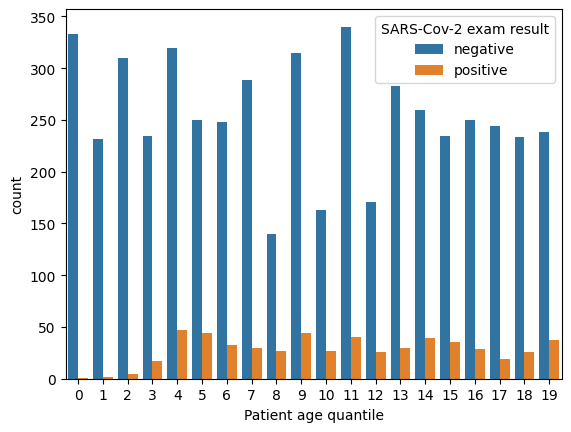

In [92]:
#Relation target / age
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)
df['Patient age quantile'].value_counts()

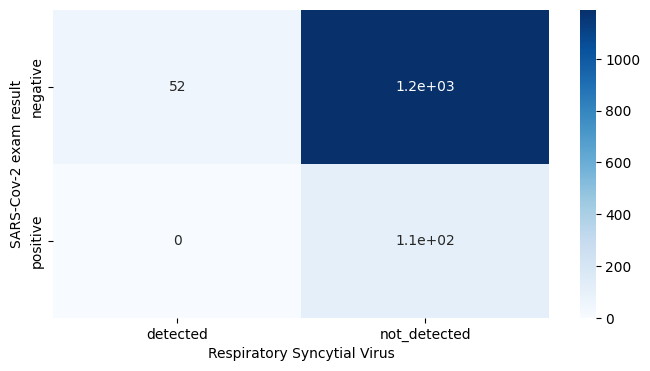

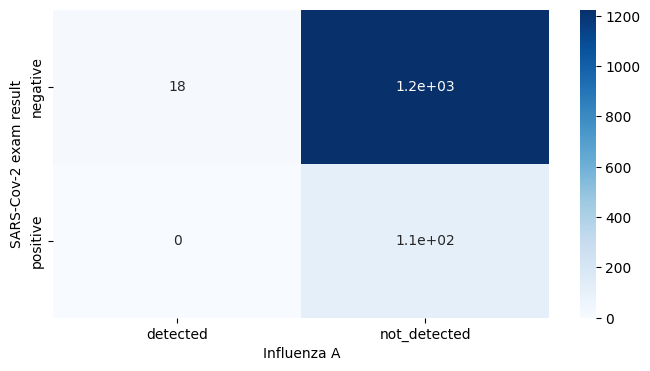

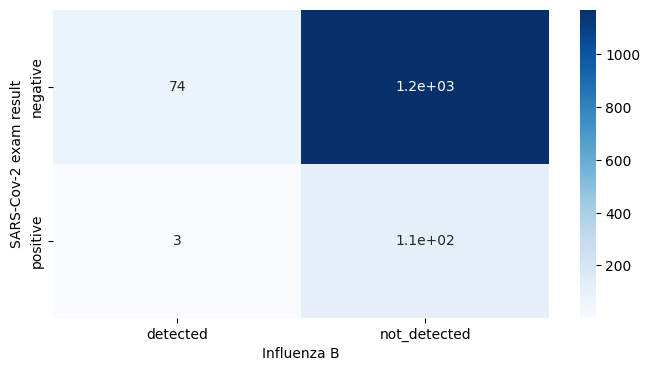

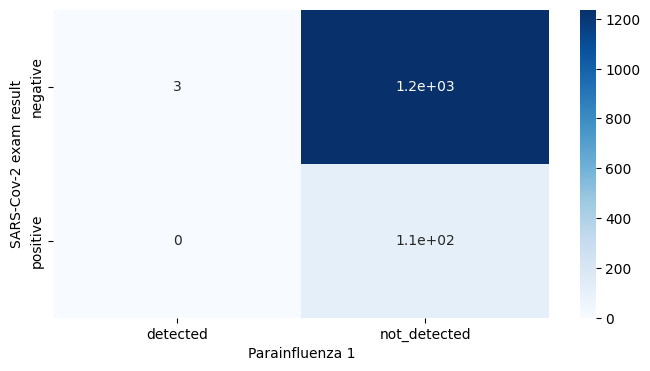

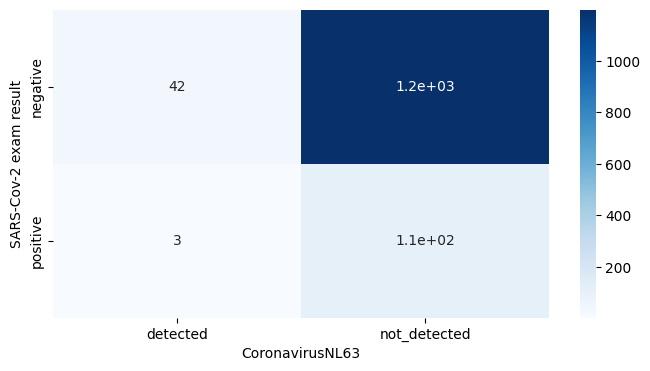

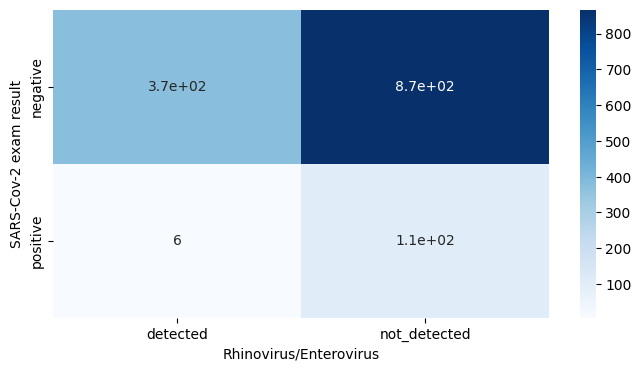

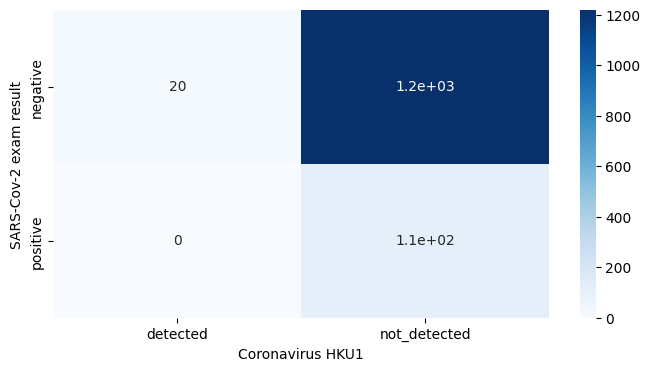

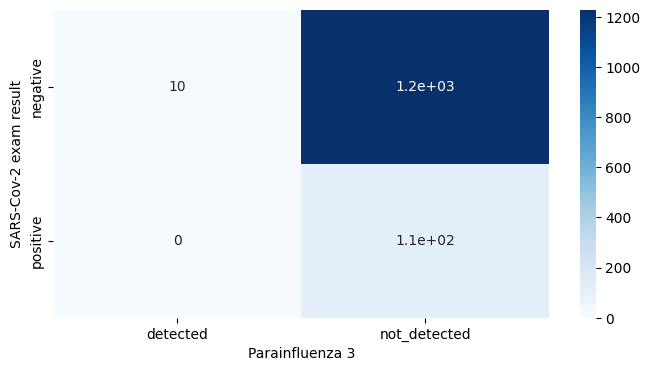

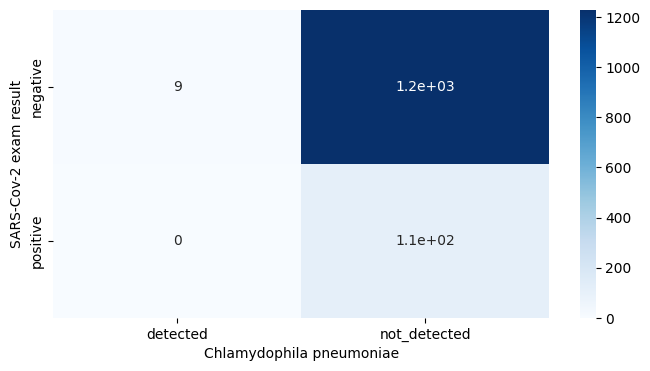

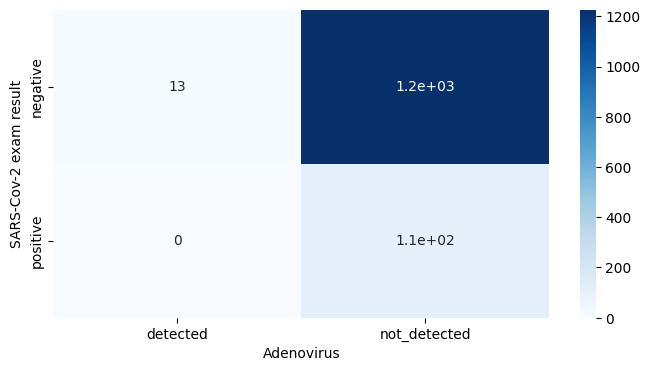

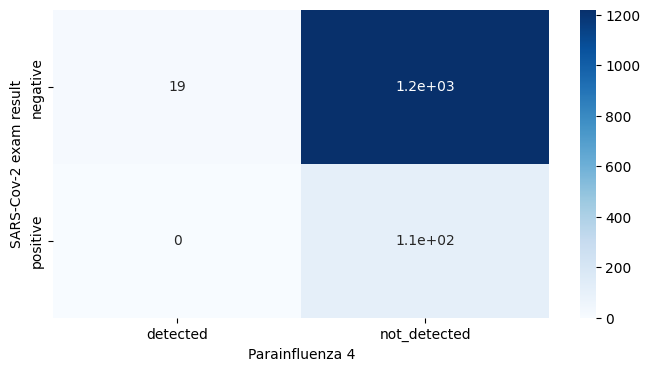

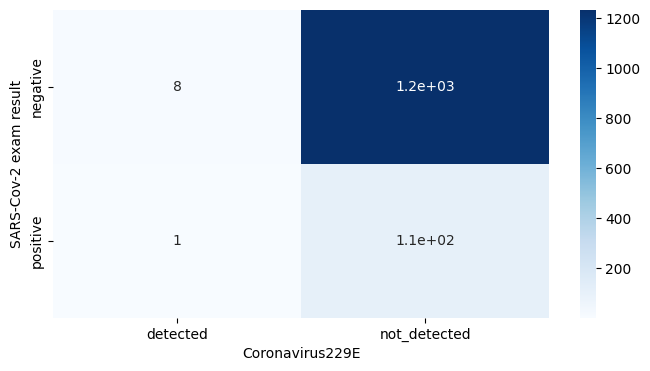

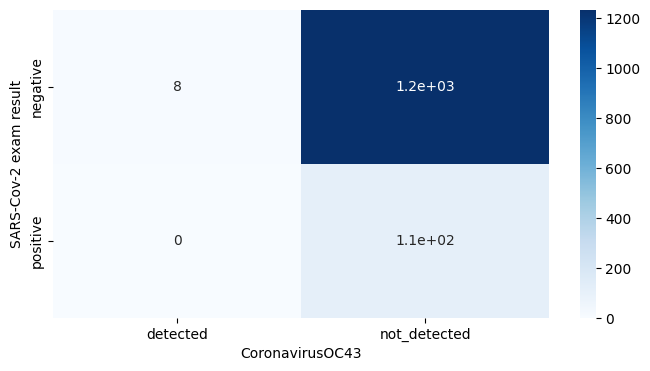

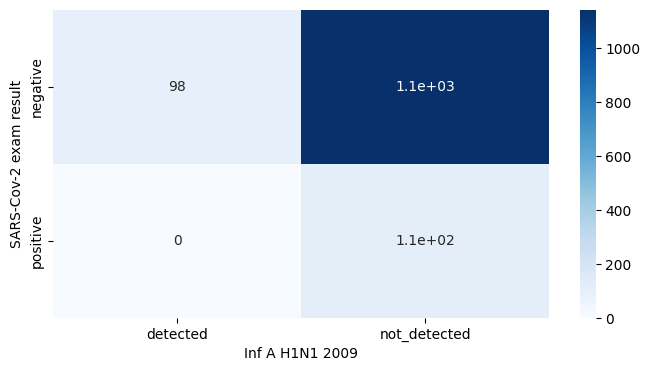

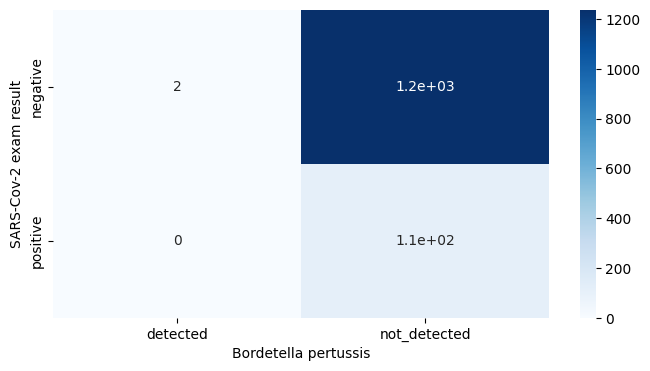

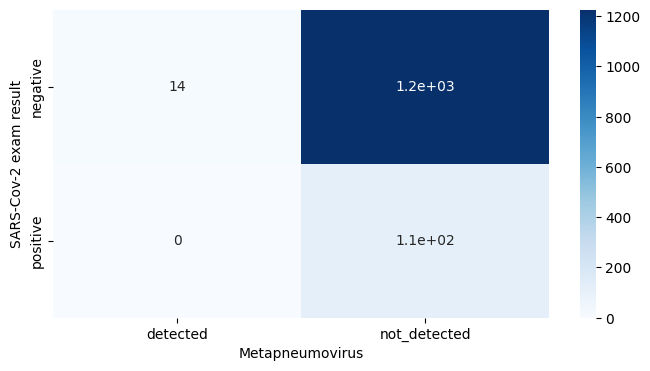

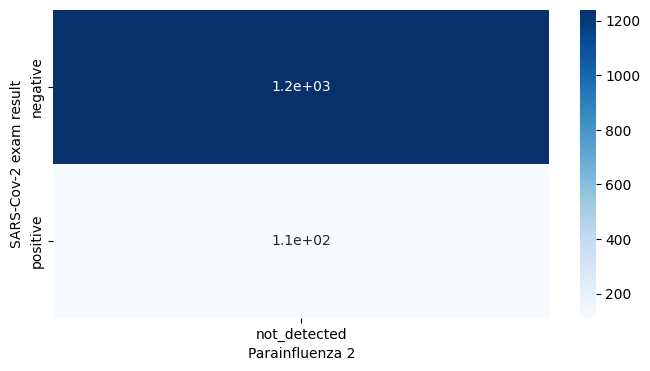

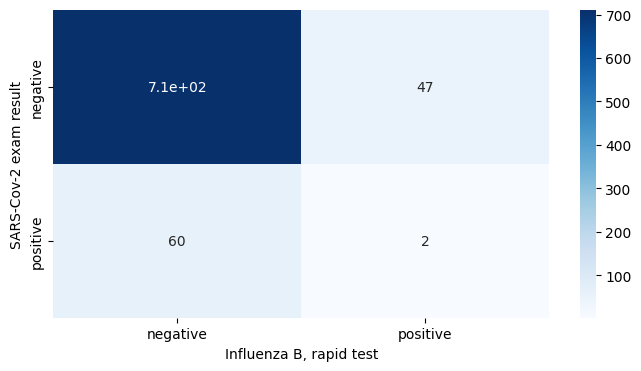

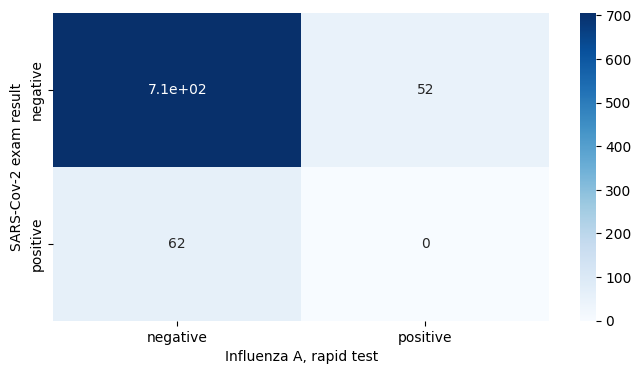

In [93]:
#target/viral
for col in viral_columns:
    plt.figure(figsize=(8, 4))
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, cmap='Blues')

In [ ]:
#Analyse plus detaille 
#Relations variables /variables 
#blood test/blood data
#blood test/viral data
#blood viral/blood viral
#Nan analse approfondie
#Tests des hypotheses :Test de student



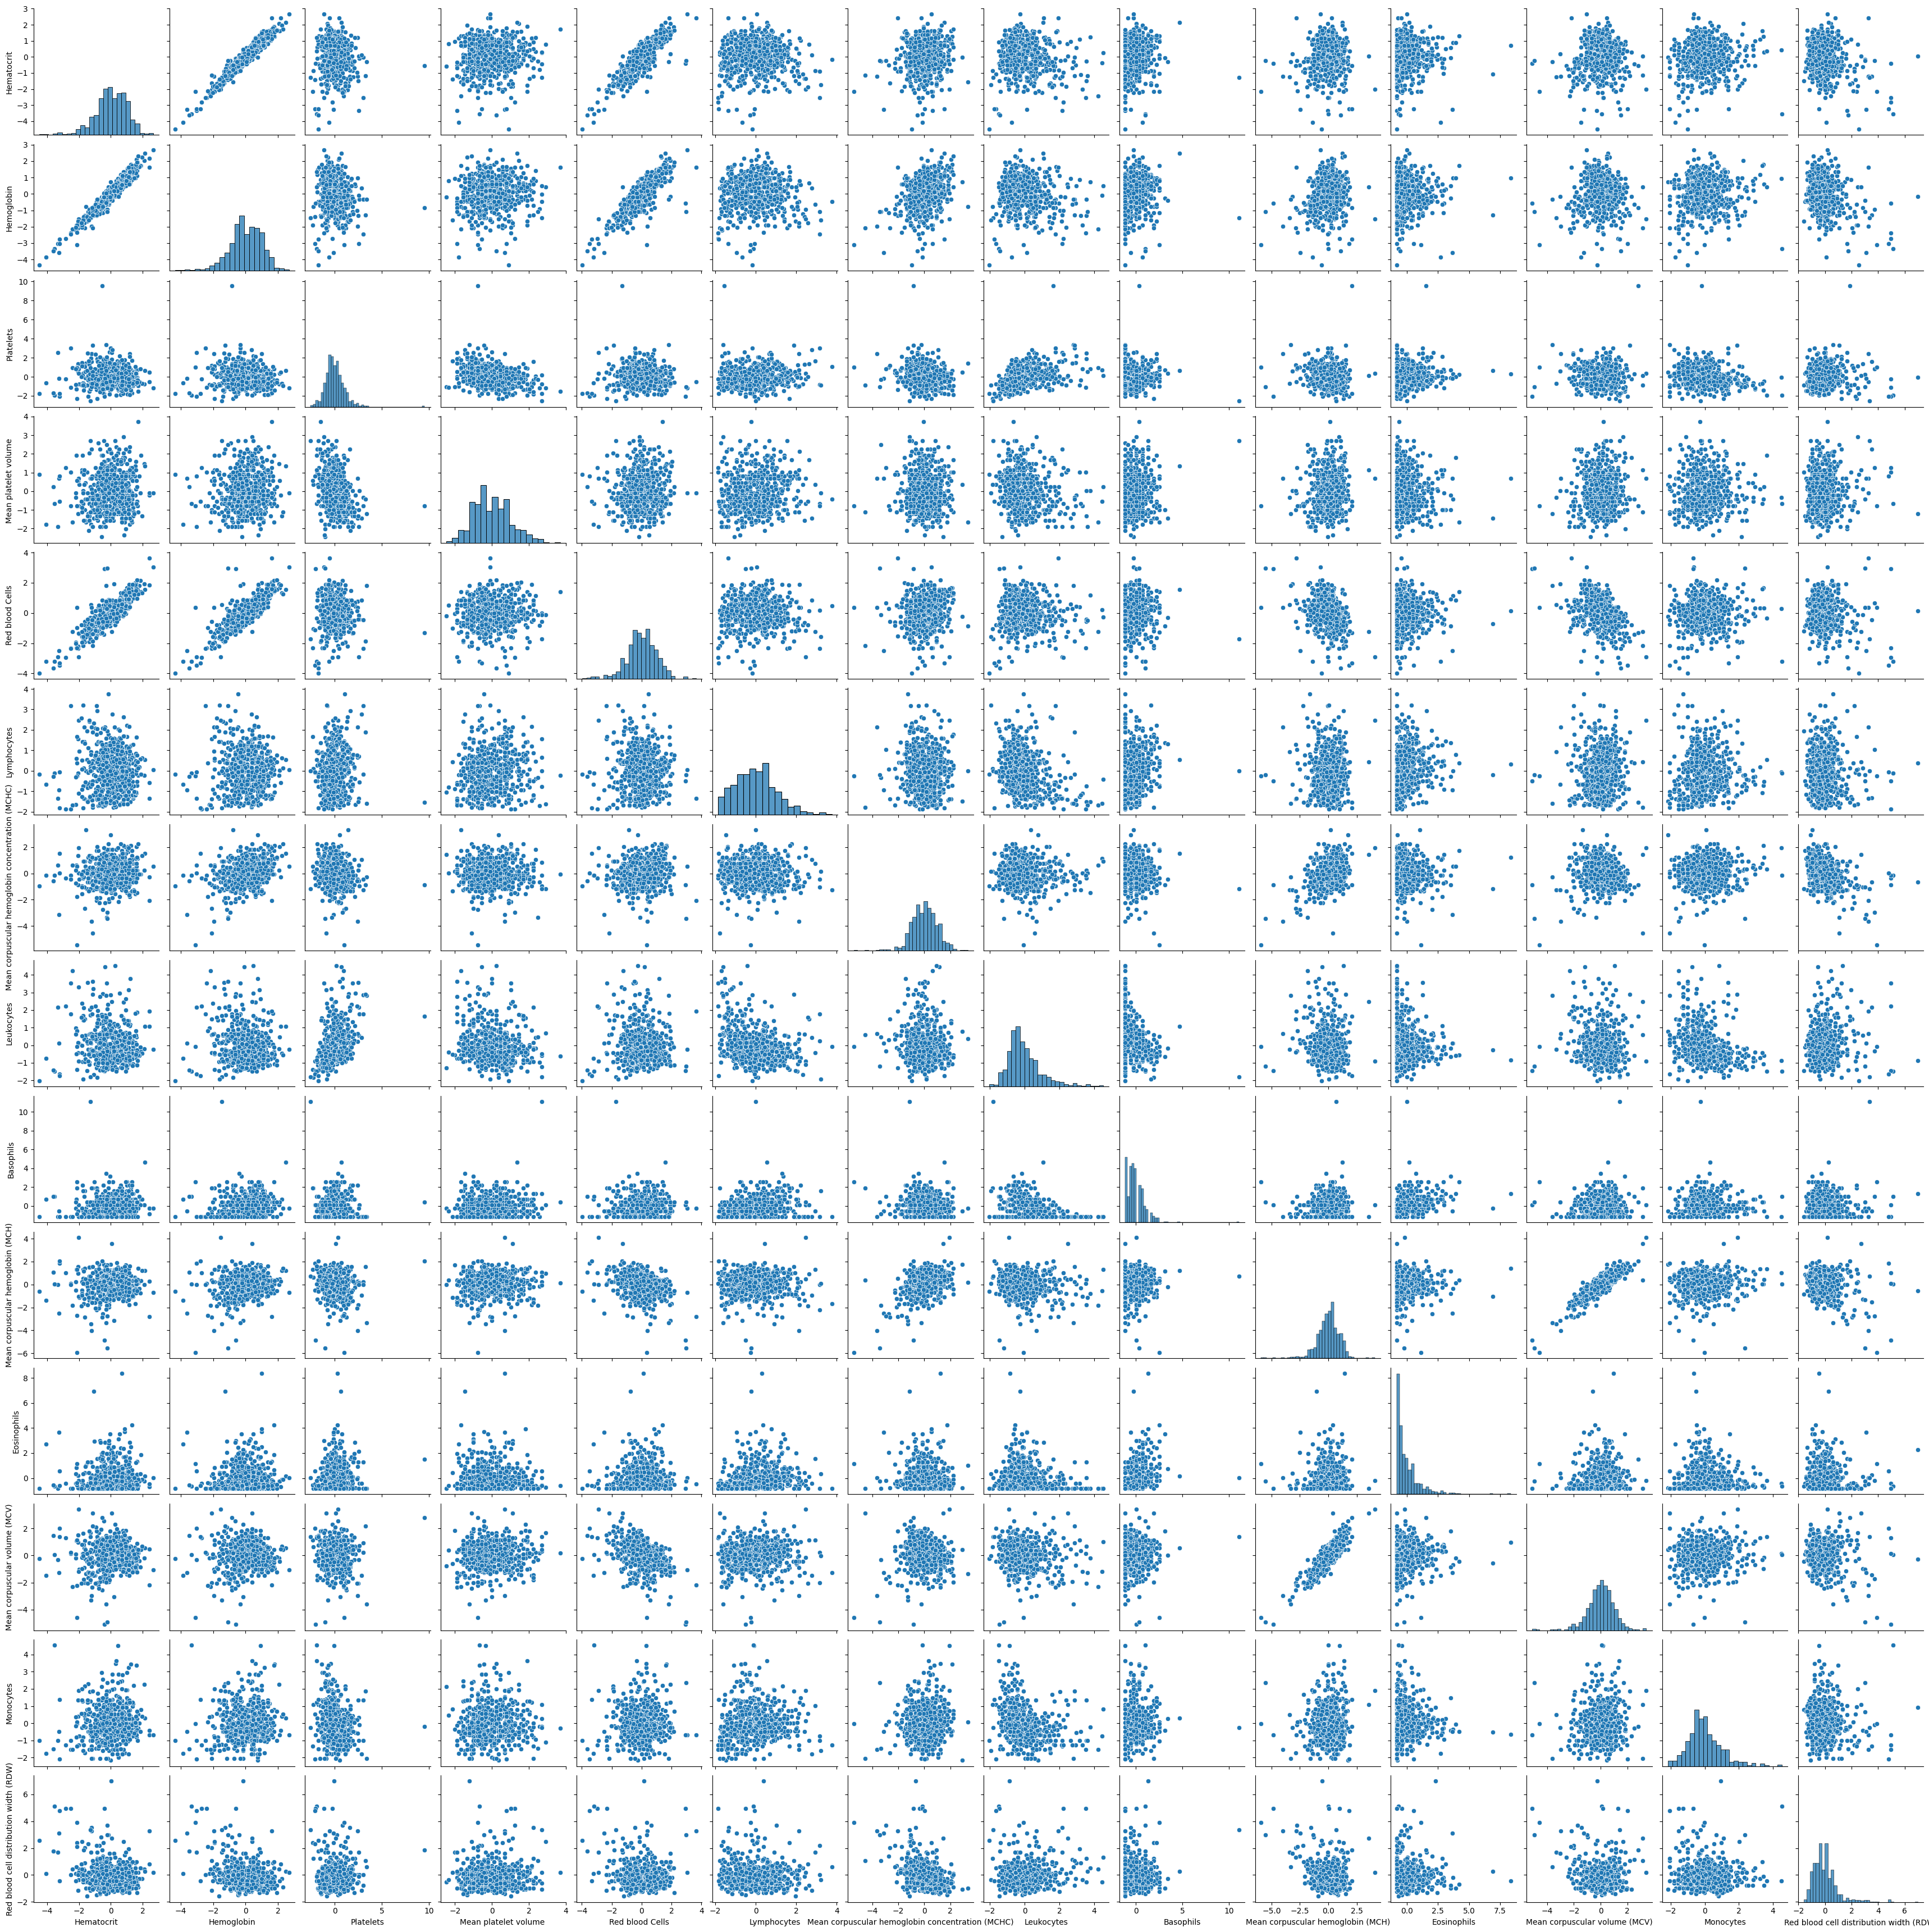

In [69]:
#Les relations blood data/blood data
sns.pairplot(df[blood_columns])


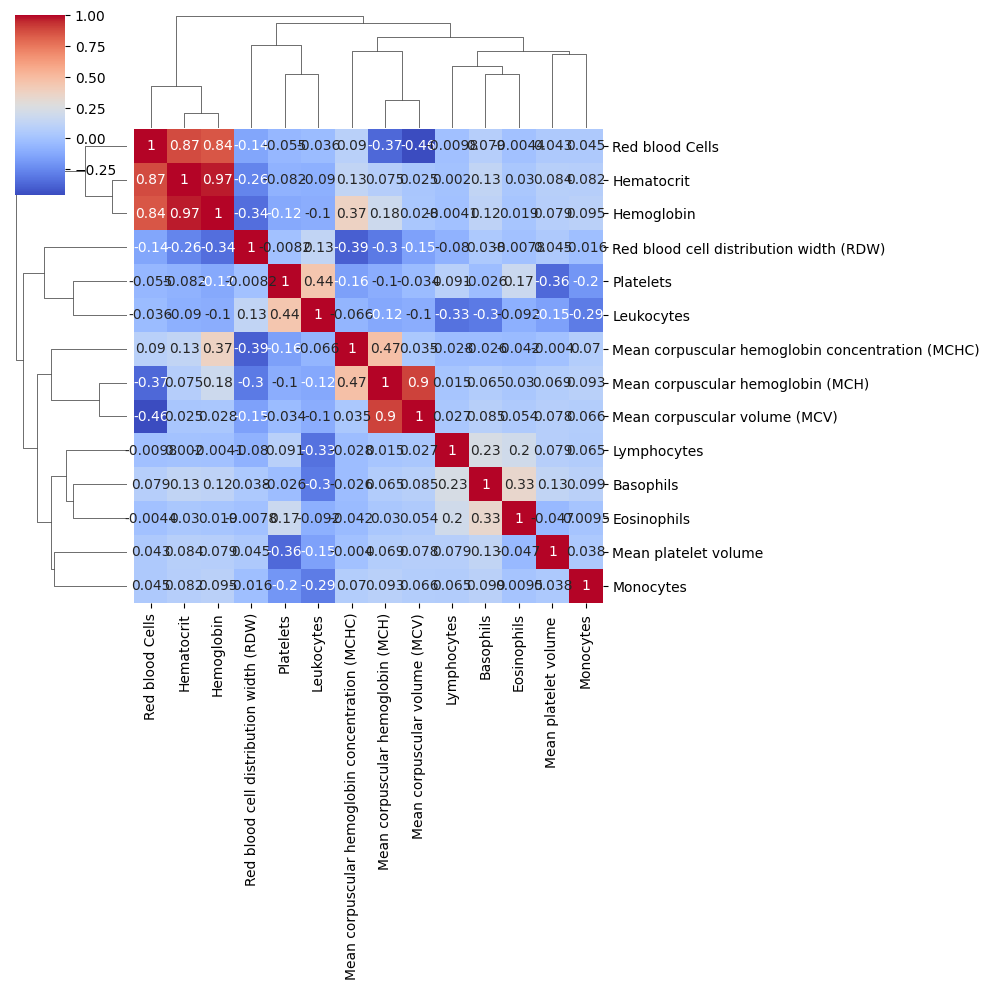

In [71]:
sns.clustermap(df[blood_columns].corr(), annot=True, cmap='coolwarm')

C:\Users\user\AppData\Local\Temp\ipykernel_22916\2261136752.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


<Figure size 800x400 with 0 Axes>

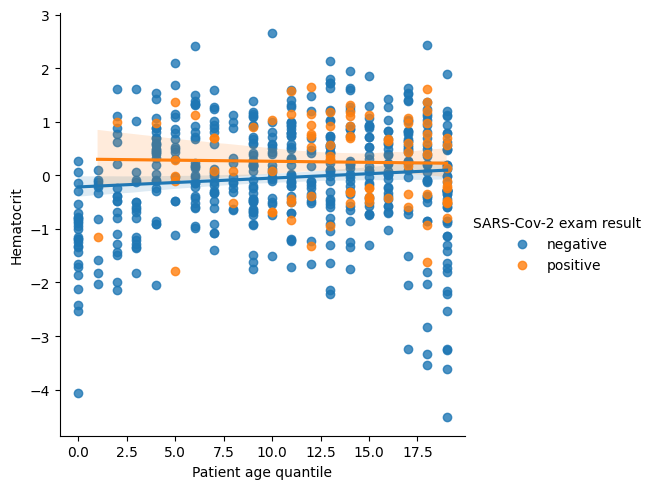

<Figure size 800x400 with 0 Axes>

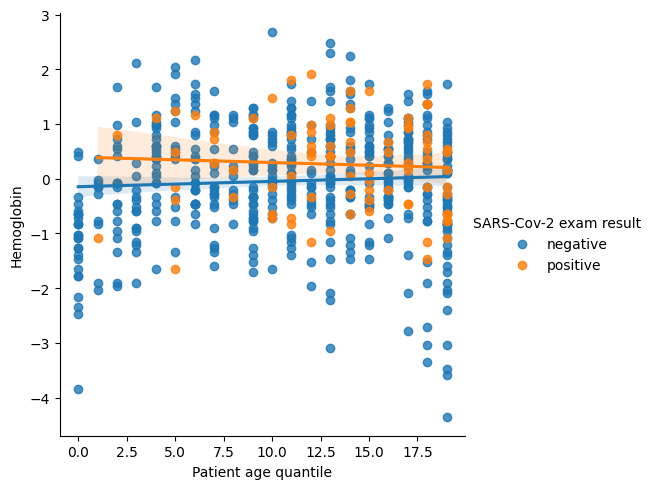

<Figure size 800x400 with 0 Axes>

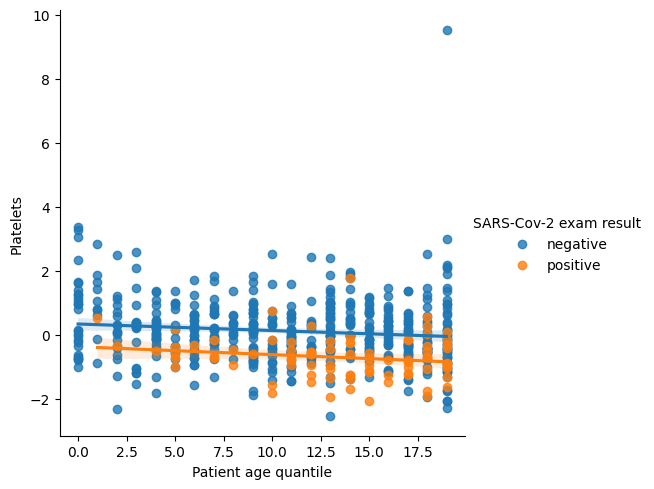

<Figure size 800x400 with 0 Axes>

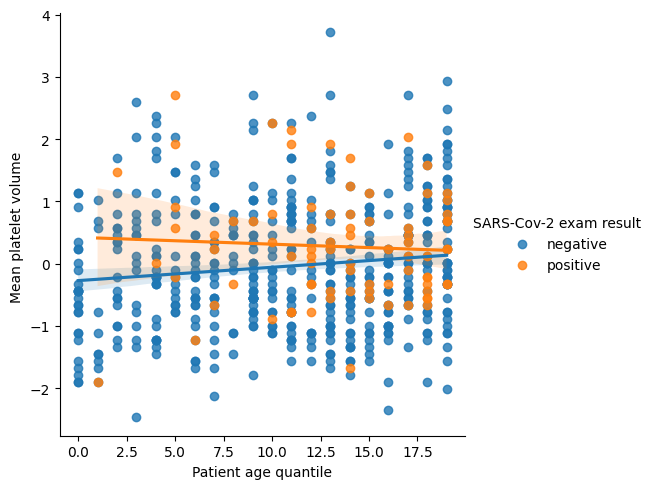

<Figure size 800x400 with 0 Axes>

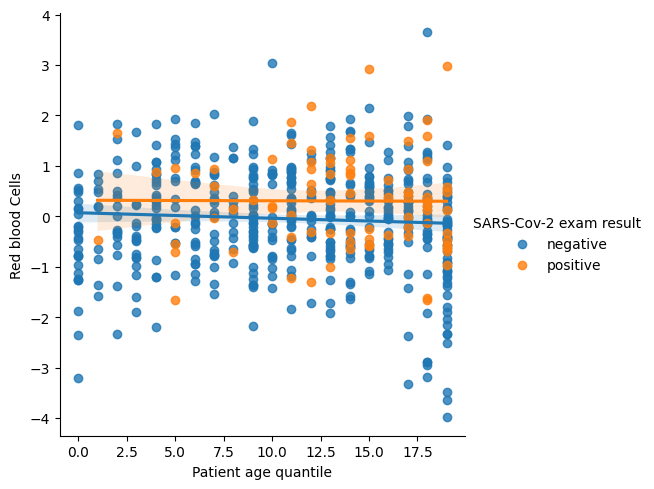

<Figure size 800x400 with 0 Axes>

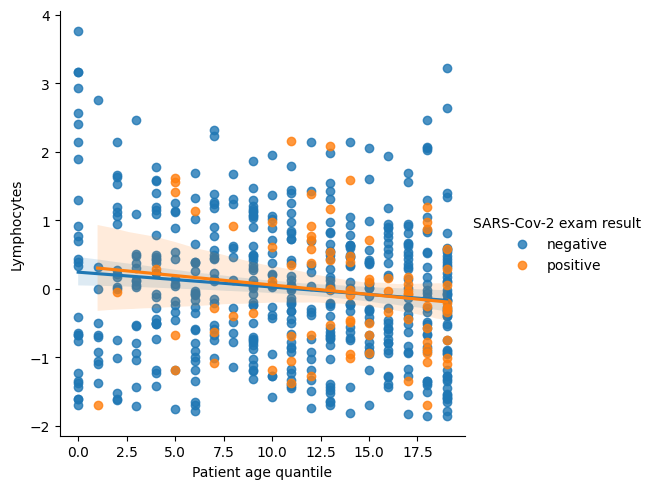

<Figure size 800x400 with 0 Axes>

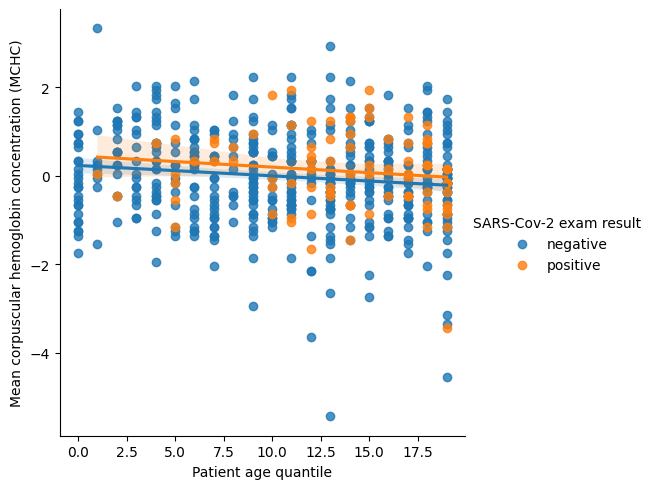

<Figure size 800x400 with 0 Axes>

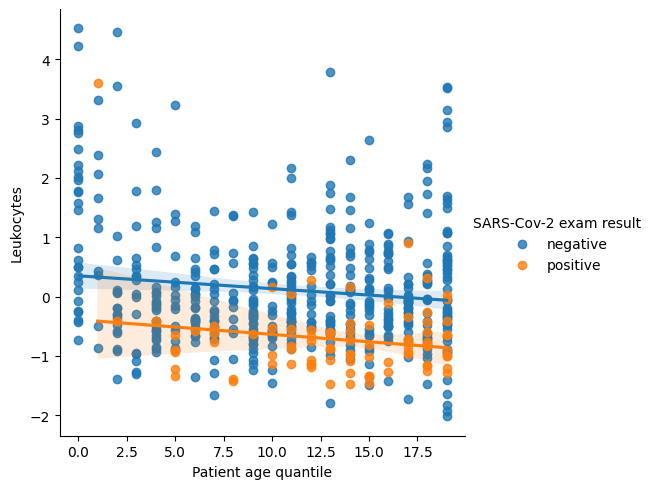

<Figure size 800x400 with 0 Axes>

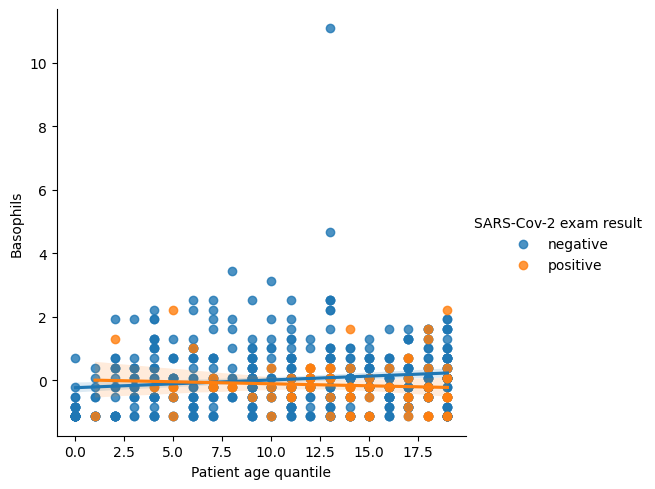

<Figure size 800x400 with 0 Axes>

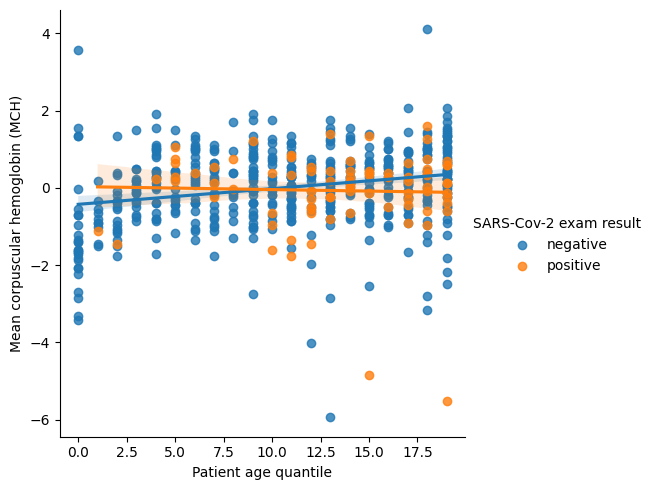

<Figure size 800x400 with 0 Axes>

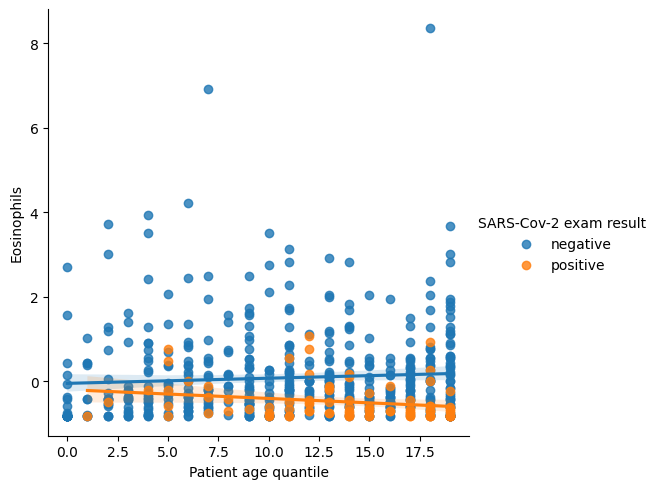

<Figure size 800x400 with 0 Axes>

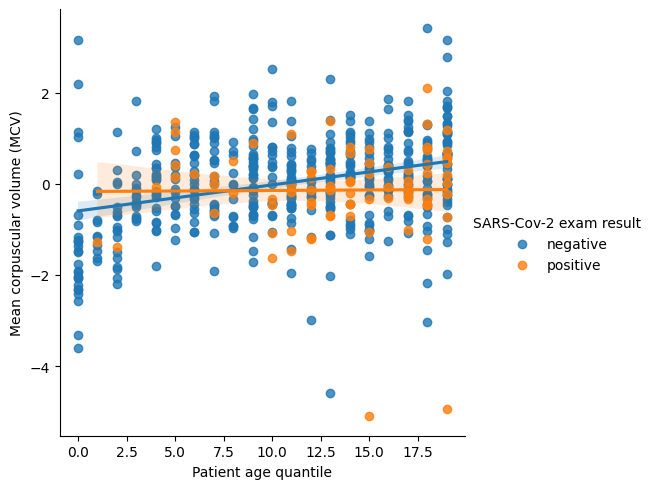

<Figure size 800x400 with 0 Axes>

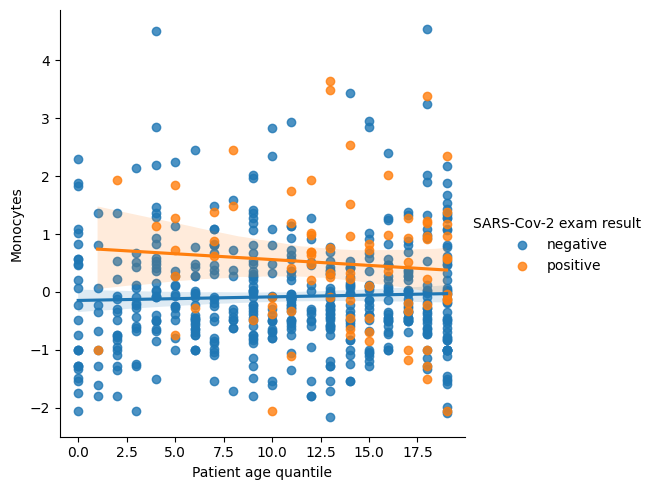

<Figure size 800x400 with 0 Axes>

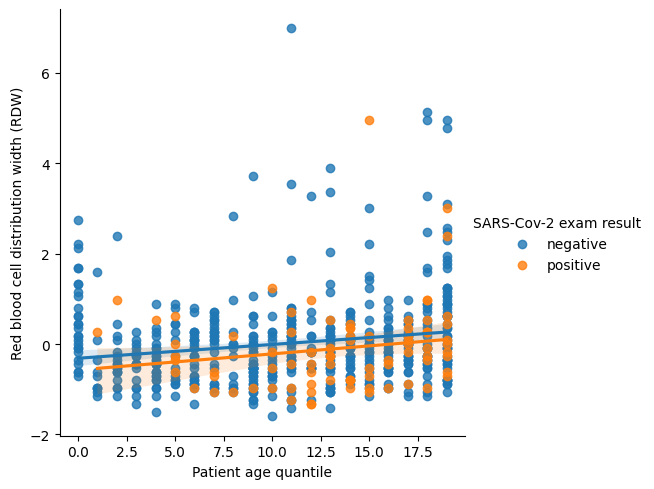

In [72]:
for col in blood_columns:
    plt.figure(figsize=(8, 4))
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [81]:
correlations = df.corr(numeric_only=True)['Patient age quantile'].sort_values(ascending=False)
print(correlations)

Patient age quantile                                     1.000000
Mean corpuscular volume (MCV)                            0.281655
Mean corpuscular hemoglobin (MCH)                        0.197394
Red blood cell distribution width (RDW)                  0.166429
Mean platelet volume                                     0.119449
Basophils                                                0.107525
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Monocytes                                                0.050962
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Eosinophils                                              0.022085
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Red blood Cells                                         -0.037510
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Lymphocyte

In [99]:
#Relations viral/viral
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])


Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [98]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])


Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [103]:
#relations maladie/blood data
df["est malade"] = (df[viral_columns[:-2]] == "detected").sum(axis=1) >= 1
df.head()


Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


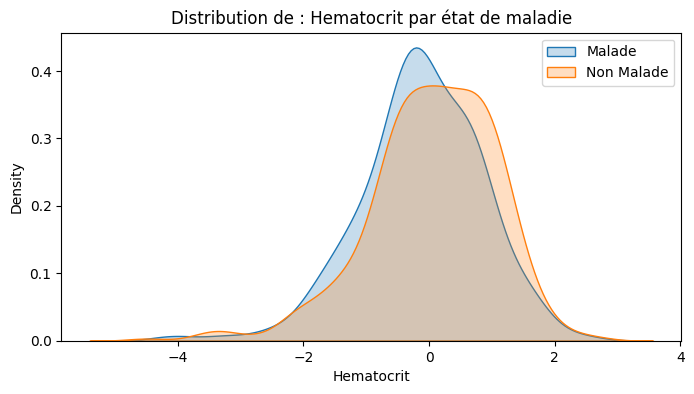

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


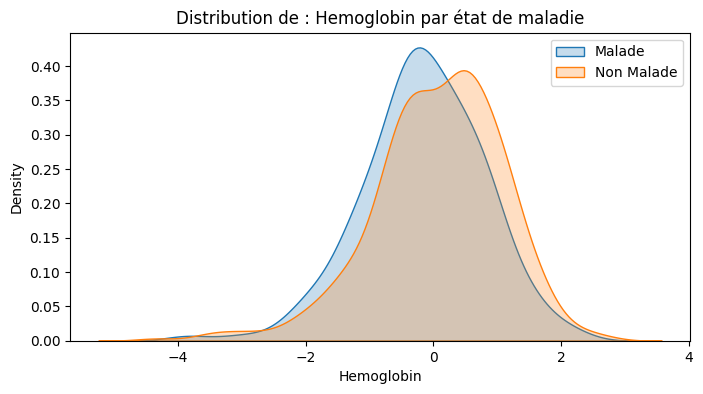

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


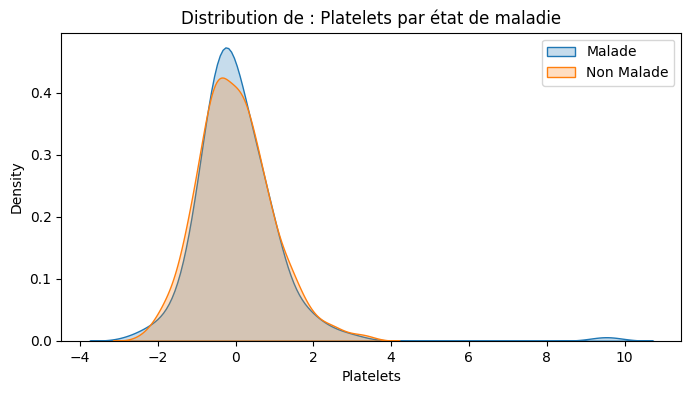

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


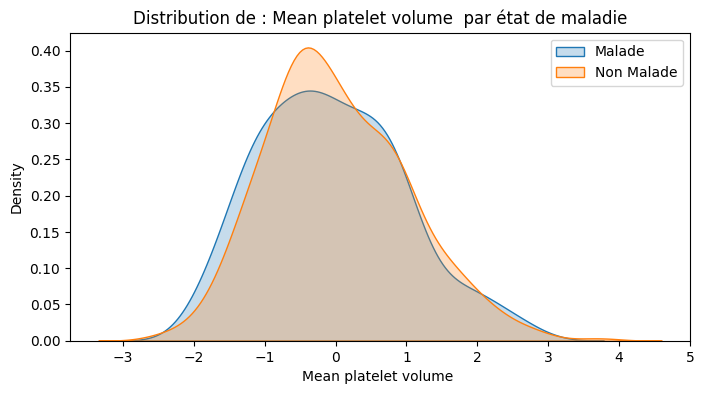

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


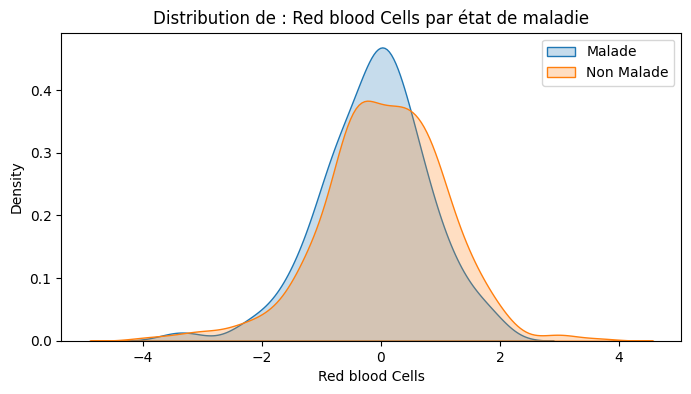

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


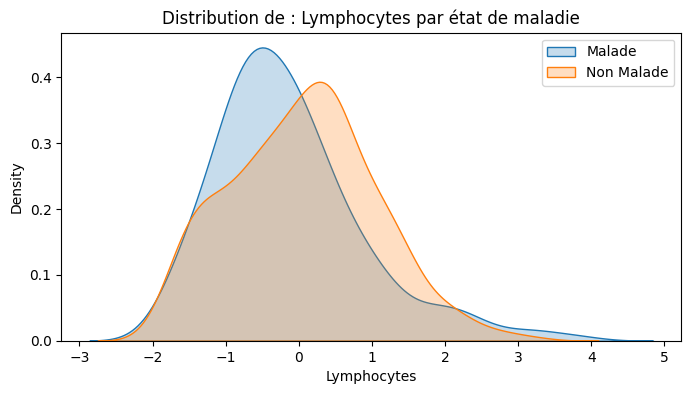

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


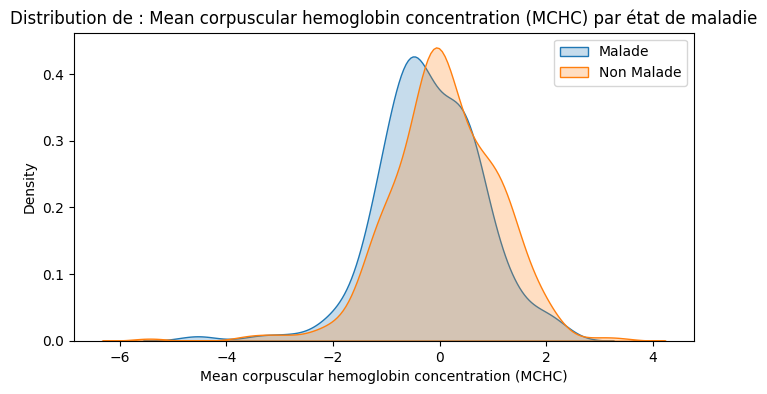

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


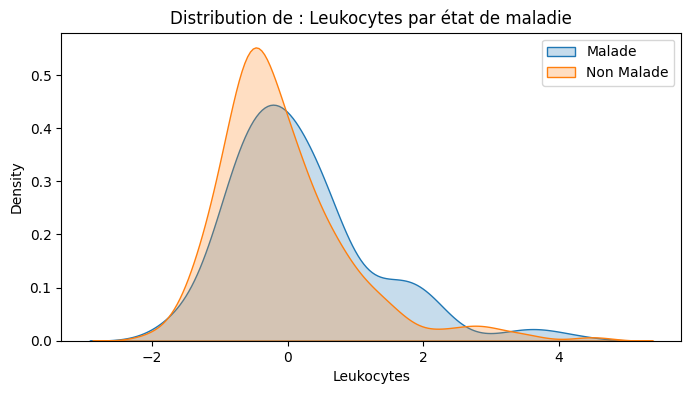

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


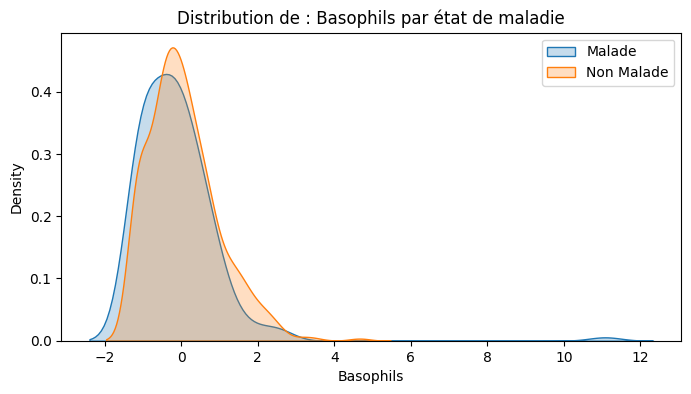

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


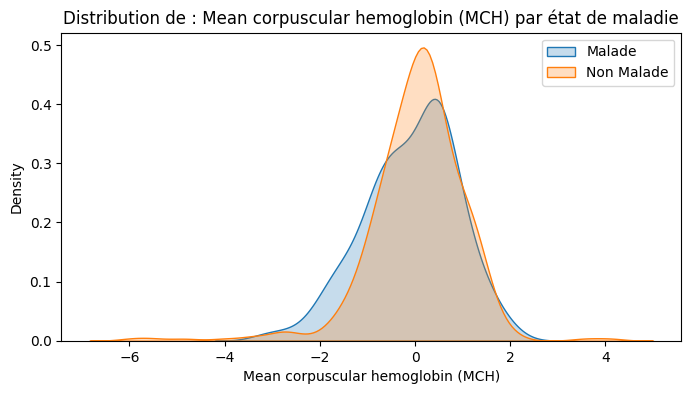

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


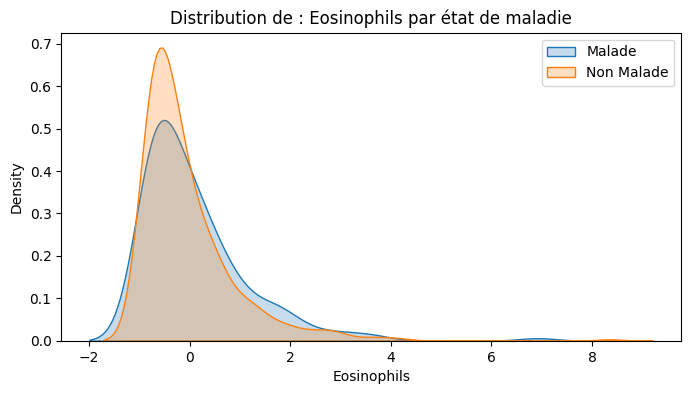

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


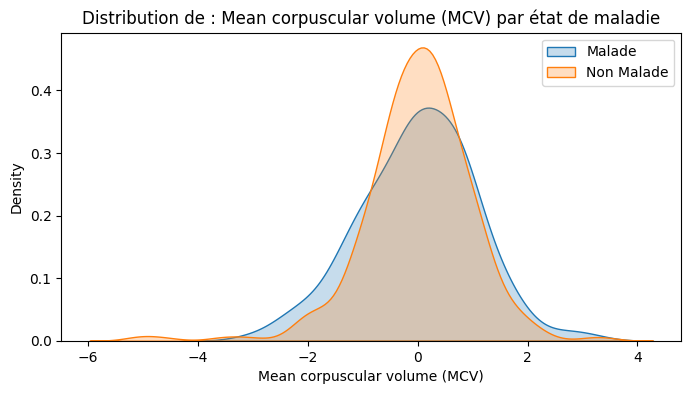

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


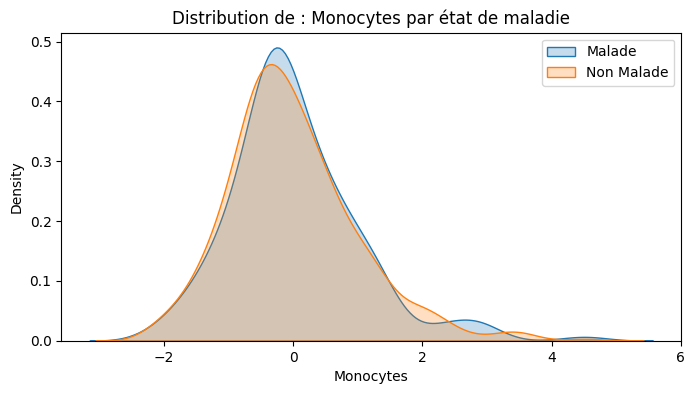

C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(malade_df[col], label='Malade', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\3227009702.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)


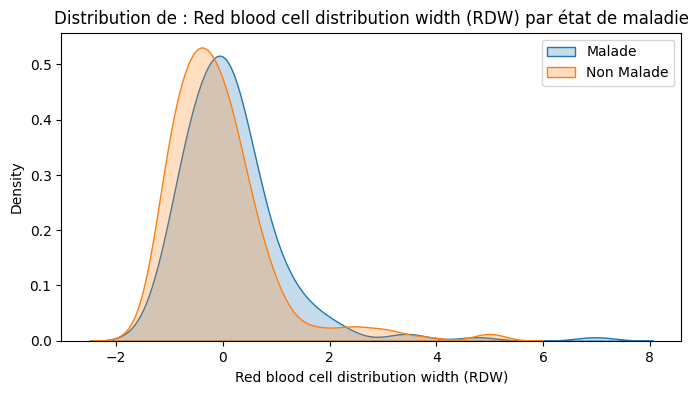

In [104]:
malade_df=df[df["est malade"]==True]
non_malade_df=df[df["est malade"]==False]
for col in blood_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(malade_df[col], label='Malade', shade=True)
    sns.kdeplot(non_malade_df[col], label='Non Malade', shade=True)
    plt.title(f"Distribution de : {col} par état de maladie")
    plt.legend()
    plt.show()

In [105]:
#Realtion  hospitalisation/malade:
def hospitalsation(df):
    if df["Patient addmited to regular ward (1=yes, 0=no)"]==1:
        return "surveillance"
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1:
        return "semi-intensive"
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"]==1:
        return "intensive"
    else:
        return "inconue"
    

In [108]:
df["statut"]=df.apply(hospitalsation,axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

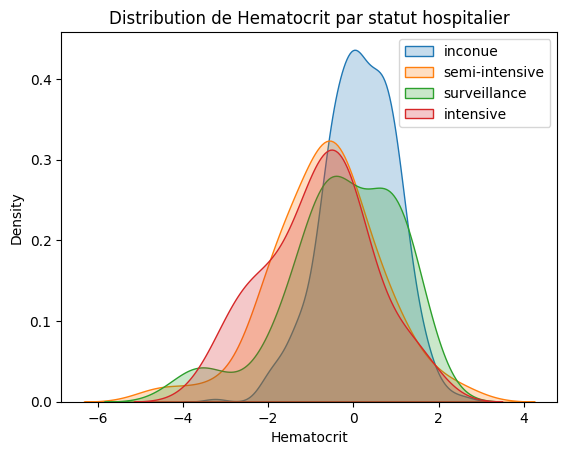

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

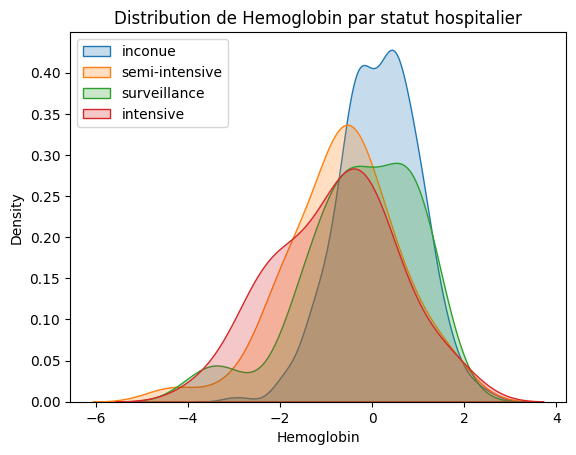

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

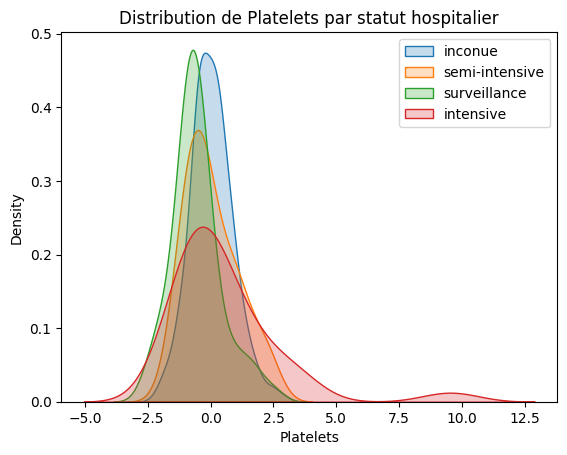

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

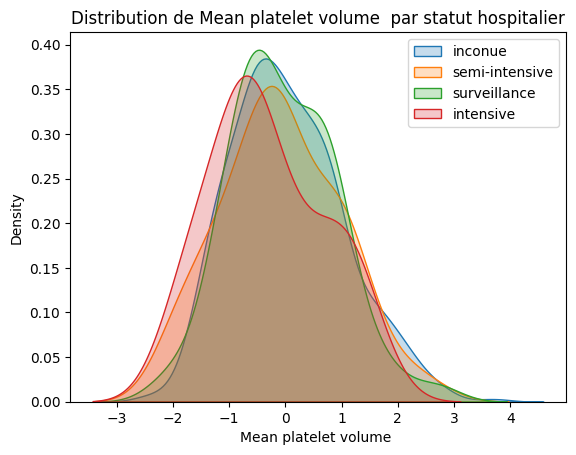

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

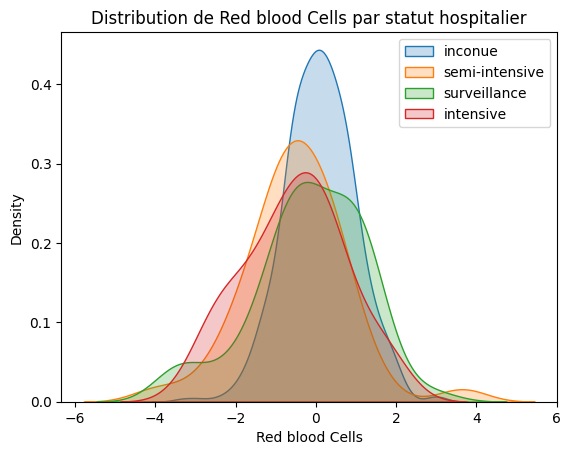

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

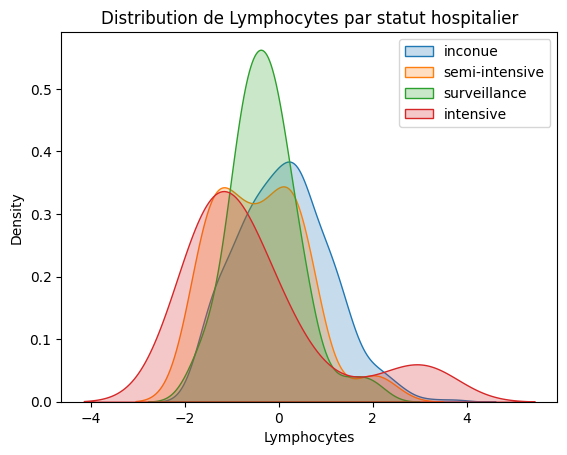

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

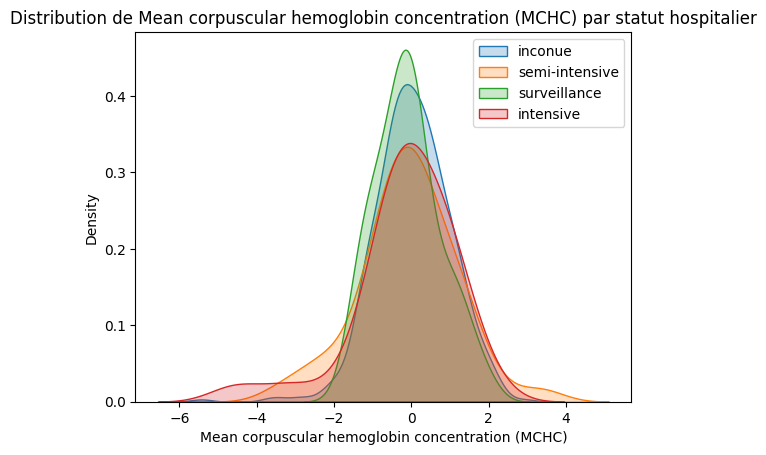

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

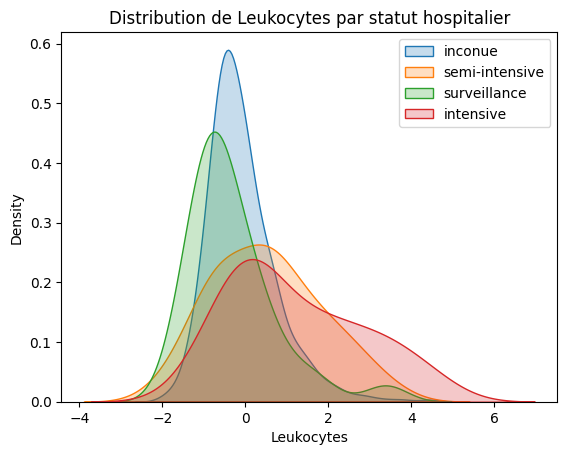

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

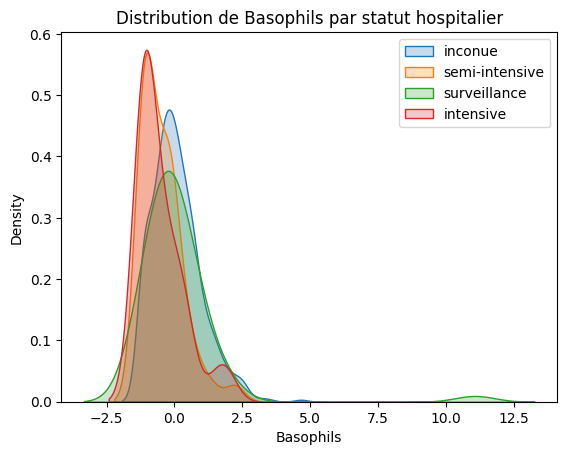

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

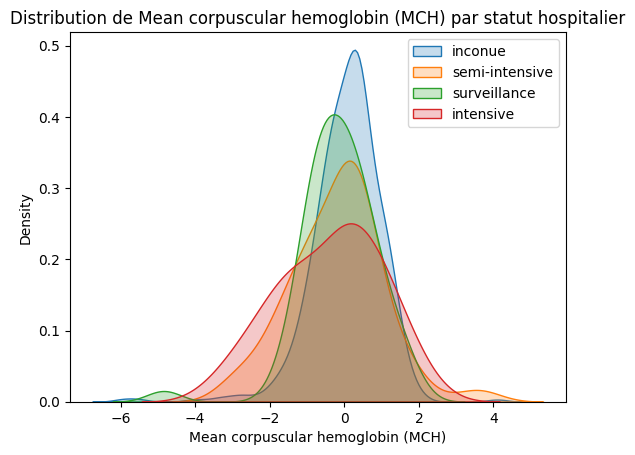

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

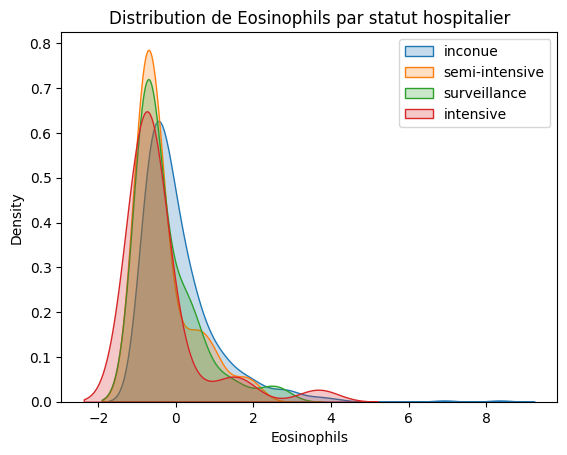

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

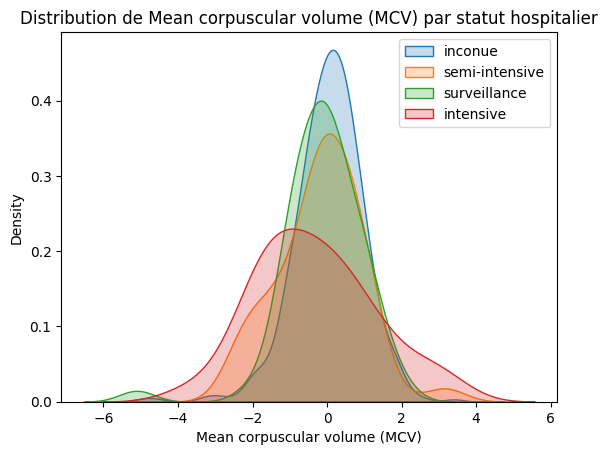

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

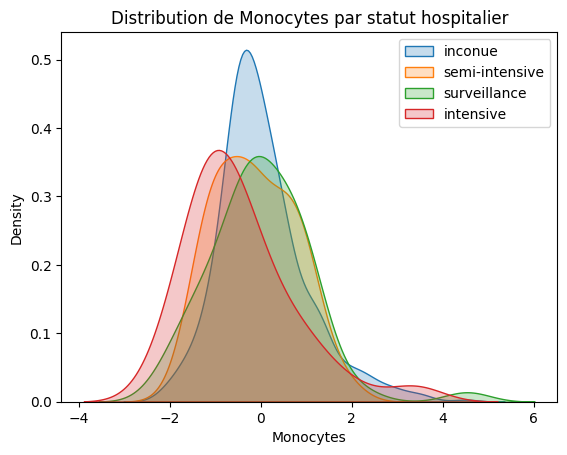

C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[col], label=cat, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22916\87536062.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14

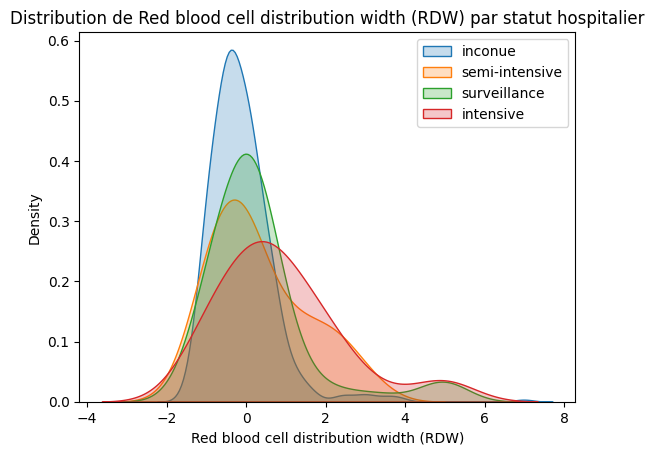

In [109]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        subset = df[df['statut'] == cat]
        sns.kdeplot(subset[col], label=cat, shade=True)
    plt.legend()
    plt.title(f"Distribution de {col} par statut hospitalier")
    plt.show()

In [110]:
#Etude des Nan
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [111]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [112]:
df[viral_columns].count()


Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [114]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [115]:
df1=df[viral_columns[:-2]]
df1["covid"]=df["SARS-Cov-2 exam result"]
df1.dropna()["covid"].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_22916\1688058268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["covid"]=df["SARS-Cov-2 exam result"]


covid
negative    1240
positive     112
Name: count, dtype: int64

In [116]:
df1=df[blood_columns[:-2]]
df1["covid"]=df["SARS-Cov-2 exam result"]
df1.dropna()["covid"].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_22916\4097231408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["covid"]=df["SARS-Cov-2 exam result"]


covid
negative    518
positive     81
Name: count, dtype: int64

In [117]:
#Test Hypothese : test de student
#on va emettre des hypotheses nulle puis on va tester pour voir 
from scipy.stats import ttest_ind

In [135]:
balanced_neg=negative_df.sample(positive_df.shape[0])

In [136]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p<alpha:
        return"Ho rejetee"
    else:
        return "0"
    

In [137]:
for col in blood_columns:
    print(f"{col:-<50} : {t_test(col)}")

Hematocrit---------------------------------------- : 0
Hemoglobin---------------------------------------- : 0
Platelets----------------------------------------- : Ho rejetee
Mean platelet volume ----------------------------- : Ho rejetee
Red blood Cells----------------------------------- : 0
Lymphocytes--------------------------------------- : 0
Mean corpuscular hemoglobin concentration (MCHC)-- : 0
Leukocytes---------------------------------------- : Ho rejetee
Basophils----------------------------------------- : 0
Mean corpuscular hemoglobin (MCH)----------------- : 0
Eosinophils--------------------------------------- : Ho rejetee
Mean corpuscular volume (MCV)--------------------- : 0
Monocytes----------------------------------------- : Ho rejetee
Red blood cell distribution width (RDW)----------- : 0
